# Proyecto Integrador M4

BIOGENESYS te ha contratado como Data Analyst para que realices un estudio que ayudará en su estrategia de expansión en Latinoamérica específicamente en Colombia, Argentina, Chile, México, Perú y Brasil. Este proyecto es vital para que estén preparados y puedan tener una respuesta rápida ante cualquier situación futura que pueda surgir, la directiva ha propuesto que para poder hacer esta inversión necesitan ubicar regiones y recolectar datos que sean de importancia y que les ayuden a tomar decisiones. Por lo tanto, tú deberás utilizar distintas herramientas vistas en la carrera para poder ayudar a los directivos a tomar decisiones en este proceso.

# Avance 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Leer el archivo 
data = pd.read_csv('D:\DATOS\Desktop\PI M4\data_latinoamerica.csv',sep=',',parse_dates=['date'])
print(f"Registros: {data.shape[0]}, Columnas: {data.shape[1]}") ## verificación de dimenciones

Registros: 12216057, Columnas: 50


In [4]:
data.describe()


date  new_confirmed  new_deceased  cumulative_confirmed  \
count             12216057   6.377003e+06  6.322319e+06          6.377372e+06   
mean   2021-05-10 00:00:00   3.195397e+01  7.014179e-01          1.207447e+04   
min    2020-01-01 00:00:00  -7.390700e+04 -4.109000e+03          0.000000e+00   
25%    2020-09-04 00:00:00   0.000000e+00  0.000000e+00          1.470000e+02   
50%    2021-05-10 00:00:00   0.000000e+00  0.000000e+00          6.060000e+02   
75%    2022-01-13 00:00:00   4.000000e+00  0.000000e+00          1.993000e+03   
max    2022-09-17 00:00:00   2.984080e+05  1.144700e+04          3.456883e+07   
std                    NaN   7.747720e+02  1.809587e+01          2.666495e+05   

       cumulative_deceased  cumulative_vaccine_doses_administered  \
count         6.322681e+06                           2.679290e+05   
mean          3.335522e+02                           1.670412e+06   
min           0.000000e+00                           0.000000e+00   
25%           3.000000e+00                           4.032000e+03   
50%           1.200000e+01                           1.540200e+04   
75%           4.200000e+01                           7.127800e+04   
max           6.852030e+05                           3.478685e+08   
std           6.907971e+03                           1.394951e+07   

         population  population_male  population_female  population_rural  \
count  1.168389e+07     1.109226e+07       1.109226e+07      1.982000e+04   
mean   1.406549e+05     7.253378e+04       7.532300e+04      5.750908e+06   
min    4.000000e+00     1.200000e+01       2.900000e+01      1.583400e+05   
25%    4.533000e+03     2.222000e+03       2.190000e+03      1.903325e+06   
50%    1.140500e+04     5.527000e+03       5.471000e+03      3.026413e+06   
75%    2.950400e+04     1.414700e+04       1.424100e+04      6.472742e+06   
max    2.125594e+08     1.044358e+08       1.081236e+08      2.780789e+07   
std    2.446017e+06     1.230849e+06       1.278685e+06      7.312541e+06   

       ...  population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count  ...             1.982000e+04      1.783800e+04      17838.000000   
mean   ...             5.843237e+06      9.836958e+05      25080.055556   
min    ...             1.055472e+06      4.590000e+02       2882.000000   
25%    ...             1.802445e+06      7.171400e+04       4051.000000   
50%    ...             2.913366e+06      1.422125e+05       9041.500000   
75%    ...             7.681315e+06      1.090598e+06      34403.000000   
max    ...             2.184651e+07      8.241430e+06     134981.000000   
std    ...             6.469534e+06      1.904192e+06      36307.474080   

       life_expectancy  adult_male_mortality_rate  \
count     19820.000000               19820.000000   
mean         76.013060                 168.577850   
min          71.239000                 107.669000   
25%          74.114000                 146.329500   
50%          76.094000                 162.559000   
75%          77.909750                 198.181250   
max          80.095000                 268.447000   
std           2.534679                  39.070057   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                 19820.000000              18829.000000   
mean                     91.203600                 41.626316   
min                      56.969000                 17.500000   
25%                      76.493500                 25.800000   
50%                      89.746500                 37.000000   
75%                     105.264250                 57.500000   
max                     138.315000                 73.800000   
std                      21.244494                 16.356532   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                18829.000000   2.096754e+06          2.095921e+06  
mean                    15.178947   2.388179e+01          8.822646e+03  
min                     11

Procedemos a seleccionar los países donde se expandirán: Colombia, Argentina, Chile, México, Perú y Brasil. Adicionalmente se seleccionan los registros despues de 2021-01-01  

In [5]:
paises=['Argentina','Chile', 'Colombia','Mexico','Peru','Brazil']
data['date'] = pd.to_datetime(data['date'])   ## convertrimos la columna date en datetime

In [6]:
data_latam= data[(data['country_name'].isin(paises)) & (data['date'] >= '2021-01-01')] ## filtrado 1

### Veremos con cuantas filas y columnas queda despues del primer filtro                               

In [7]:
print(f"Registros: {data_latam.shape[0]}, Columnas: {data_latam.shape[1]}")

Registros: 7549375, Columnas: 50


### Veremos cantidad de registros por país

In [8]:
data_latam['country_name'].value_counts()

country_name
Brazil       3510000
Mexico       1561250
Peru         1188125
Colombia      722500
Argentina     340625
Chile         226875
Name: count, dtype: int64

### se filtrara nuevamente la data por regiones, para evitar sesgos en cuanto a regiones  internas.(filtro sobre LocationKey)                       

In [9]:
location = ['AR', 'BR', 'CL', 'CO', 'MX', 'PE']
data_final = data_latam[data_latam['location_key'].isin(location)]
print(f"Registros: {data_final.shape[0]}, Columnas: {data_final.shape[1]}") ## verificación de dimenciones


Registros: 3750, Columnas: 50


### porcentajes de datos nulos por columna

In [10]:
print((data_final.isnull().sum() / len(data_final) * 100).round(2))

location_key                              0.00
date                                      0.00
country_code                              0.00
country_name                              0.00
new_confirmed                             0.56
new_deceased                              0.56
cumulative_confirmed                      0.56
cumulative_deceased                       0.56
cumulative_vaccine_doses_administered    15.71
population                                0.00
population_male                           0.00
population_female                         0.00
population_rural                          0.00
population_urban                          0.00
population_density                        0.00
human_development_index                   0.00
population_age_00_09                      0.00
population_age_10_19                      0.00
population_age_20_29                      0.00
population_age_30_39                      0.00
population_age_40_49                      0.00
population_ag

### Considerando los valores NaN, se procede a normaizar pensando en un contexto de campos totalmente nulos     

In [11]:
data_final=data_final.dropna(axis=0,how='all')  ## filas
data_final=data_final.dropna(axis=1,how='all')  ## columnas
print(f"Registros: {data_final.shape[0]}, Columnas: {data_final.shape[1]}") ## verificación de dimenciones


Registros: 3750, Columnas: 50


### realizemos imputación de datos

In [12]:
# Asegurarse de que 'date' es datetime y ordenar los datos
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')
data_final.sort_values(by=['country_name', 'date'], inplace=True)

for pais in data_final['country_name'].unique():
    data_final['new_confirmed'].fillna(data_final.loc[data_final['country_name'] == pais, 'new_confirmed'].median(), inplace=True)
    data_final['new_deceased'].fillna(data_final.loc[data_final['country_name'] == pais, 'new_deceased'].median(), inplace=True)
    data_final['cumulative_confirmed'].ffill(inplace=True)
    data_final['cumulative_deceased'].ffill(inplace=True)
    data_final['cumulative_vaccine_doses_administered'].fillna(0,inplace=True)
    data_final['rainfall_mm'].fillna(data_final.loc[data_final['country_name'] == pais, 'rainfall_mm'].median(), inplace=True)
    data_final['relative_humidity'].fillna(data_final.loc[data_final['country_name'] == pais, 'relative_humidity'].median(), inplace=True)
    data_final['average_temperature_celsius'].ffill(inplace=True)
    data_final['minimum_temperature_celsius'].ffill(inplace=True)
    data_final['maximum_temperature_celsius'].ffill(inplace=True)
    data_final['new_recovered'].fillna(0, inplace=True)
    data_final['cumulative_recovered'].fillna(data_final.loc[data_final['country_name'] == pais, 'cumulative_recovered'].median(), inplace=True)




In [13]:
data_final.isna().sum() # revisar que la imputación se hizo correctamente, mirando la cantidad de vacios por  columna

location_key                             0
date                                     0
country_code                             0
country_name                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
population                               0
population_male                          0
population_female                        0
population_rural                         0
population_urban                         0
population_density                       0
human_development_index                  0
population_age_00_09                     0
population_age_10_19                     0
population_age_20_29                     0
population_age_30_39                     0
population_age_40_49                     0
population_age_50_59                     0
population_age_60_69                     0
population_

### Estadisticas generales por columna

In [14]:
def estadisticas(data):
    for i in   data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(f"Columna: {i}")
            print(f"Media: {data[i].mean()}")
            print(f"Valor mínimo: {data[i].min()}")
            print(f"Valor máximo: {data[i].max()}")
            print(f"Cuartil 25%: {data[i].quantile(0.25)}")
            print(f"Cuartil 50% (Mediana): {data[i].quantile(0.5)}")
            print(f"Cuartil 75%: {data[i].quantile(0.75)}")
            print(f"Desviación estándar: {data[i].std()}")
            print(f"Varianza: {data[i].var()}")
            print(f"Rango:{data[i].max()-data[i].min()}")
            print("\n")
        

In [15]:
estadisticas(data_final)

Columna: new_confirmed
Media: 13875.594933333334
Valor mínimo: -573.0
Valor máximo: 298408.0
Cuartil 25%: 1538.25
Cuartil 50% (Mediana): 5174.0
Cuartil 75%: 14802.5
Desviación estándar: 24198.788513726526
Varianza: 585581365.5320629
Rango:298981.0


Columna: new_deceased
Media: 276.1008
Valor mínimo: 0.0
Valor máximo: 11447.0
Cuartil 25%: 26.0
Cuartil 50% (Mediana): 98.0
Cuartil 75%: 311.75
Desviación estándar: 507.03391794278804
Varianza: 257083.39394441393
Rango:11447.0


Columna: cumulative_confirmed
Media: 6786495.4992
Valor mínimo: 971.0
Valor máximo: 34568833.0
Cuartil 25%: 2130489.75
Cuartil 50% (Mediana): 3640785.5
Cuartil 75%: 6247634.0
Desviación estándar: 8001192.793824137
Varianza: 64019086123943.305
Rango:34567862.0


Columna: cumulative_deceased
Media: 192863.5696
Valor mínimo: 1.0
Valor máximo: 685203.0
Cuartil 25%: 59241.25
Cuartil 50% (Mediana): 139614.0
Cuartil 75%: 215073.0
Desviación estándar: 182912.0855876253
Varianza: 33456831054.014763
Rango:685202.0


Columna: 

In [16]:
def estadisticas_por_pais(data, pais):
    # Filtrar el DataFrame por el país especificado
    data_pais = data[data['country_name'] == pais]
    
    if data_pais.empty:
        print(f"No se encontraron datos para el país: {pais}")
        return
    
    num_cols = data_pais.select_dtypes(include=['float64', 'int64'])

    print(f"Estadísticas para el país: {pais}\n")

    for col in num_cols.columns:
        print(f"Columna: {col}")
        print(f"  Media: {data_pais[col].mean()}")
        print(f"  Valor mínimo: {data_pais[col].min()}")
        print(f"  Valor máximo: {data_pais[col].max()}")
        print(f"  Cuartil 25%: {data_pais[col].quantile(0.25)}")
        print(f"  Cuartil 50% (Mediana): {data_pais[col].quantile(0.5)}")
        print(f"  Cuartil 75%: {data_pais[col].quantile(0.75)}")
        print(f"  Desviación estándar: {data_pais[col].std()}")
        print(f"  Varianza: {data_pais[col].var()}")
        print(f"  Rango: {data_pais[col].max()-data_pais[col].min()}")
        print("\n")


In [17]:
estadisticas_por_pais(data_final,'Argentina')

Estadísticas para el país: Argentina

Columna: new_confirmed
  Media: 12845.504
  Valor mínimo: 0.0
  Valor máximo: 174174.0
  Cuartil 25%: 1239.0
  Cuartil 50% (Mediana): 5174.0
  Cuartil 75%: 14269.0
  Desviación estándar: 23516.86980107626
  Varianza: 553043165.2407726
  Rango: 174174.0


Columna: new_deceased
  Media: 133.9312
  Valor mínimo: 0.0
  Valor máximo: 656.0
  Cuartil 25%: 8.0
  Cuartil 50% (Mediana): 63.0
  Cuartil 75%: 186.0
  Desviación estándar: 165.9741544291201
  Varianza: 27547.419938461408
  Rango: 656.0


Columna: cumulative_confirmed
  Media: 6095668.3584
  Valor mínimo: 1662867.0
  Valor máximo: 9697763.0
  Cuartil 25%: 4041966.0
  Cuartil 50% (Mediana): 5321678.0
  Cuartil 75%: 9069222.0
  Desviación estándar: 2743050.7257066322
  Varianza: 7524327283799.681
  Rango: 8034896.0


Columna: cumulative_deceased
  Media: 105775.7376
  Valor mínimo: 46522.0
  Valor máximo: 129830.0
  Cuartil 25%: 88655.0
  Cuartil 50% (Mediana): 116740.0
  Cuartil 75%: 128711.0
  De

In [18]:
data_final.to_csv('DatosFinalesFiltrado.csv', index=False)

### Estas estadísticas descriptivas ayudan a:

Las métricas (media, mediana, desviación, rango, etc.) te permiten:

i. Comparar países entre sí.

ii. Detectar tendencias de crecimiento en casos o vacunación.

iii. Observar variabilidad en los indicadores sanitarios (ej. disponibilidad de médicos, camas, vacunación).

iv. Tomar decisiones para ubicar laboratorios donde la necesidad es más alta y el acceso limitado.



### ¿Se muestran todas las estadísticas en todas las columnas?
No. Solo las columnas numéricas (int64, float64) son consideradas.
Las columnas categóricas como country_name, location_key, etc., no tienen sentido en este contexto numérico.

### ¿Cómo puede esto afectar la interpretación?
Las variables no numericas brindan contexto al analisis, si no analizas variables categóricas (country_name, location_key) podrías perder respuestas a interrogantes y situaciones como:

i. Qué país tiene más registros?.

ii. Qué regiones están subrepresentadas?.

iii. Relaciones por país.

# Avance 2

### Analisis estadístico descrptivo

In [19]:
desc=data_final.describe()
desc.style.background_gradient(cmap='Blues')

### En el caso que se quieran hacer las estadísticas para una columna por país

In [20]:
import numpy as np

def resumen_estadistico(df, columna, paises):
    print(f"\nAnálisis de: {columna}")
    for pais in paises:
        data_pais = df[df['country_name'] == pais]
        if columna in data_pais.columns:
            valores = data_pais[columna].dropna()
            print(f"\nPaís: {pais}")
            print(f"  Media: {valores.mean():.2f}")
            print(f"  Mediana: {valores.median():.2f}")
            print(f"  Minimo: {valores.min():.2f}")
            print(f"  Maximo: {valores.max():.2f}")
            print(f"  Desviación estándar: {valores.std():.2f}")
            print(f"  Varianza: {valores.var():.2f}")
            print(f"  Rango: {valores.max() - valores.min():.2f}")

In [21]:
resumen_estadistico(data_final,'cumulative_vaccine_doses_administered',paises)


Análisis de: cumulative_vaccine_doses_administered

País: Argentina
  Media: 34500764.30
  Mediana: 27042989.00
  Minimo: 0.00
  Maximo: 109204825.00
  Desviación estándar: 36511379.06
  Varianza: 1333080800787369.25
  Rango: 109204825.00

País: Chile
  Media: 34893884.17
  Mediana: 38069977.00
  Minimo: 0.00
  Maximo: 62204235.00
  Desviación estándar: 19605978.99
  Varianza: 384394412100627.50
  Rango: 62204235.00

País: Colombia
  Media: 19931538.55
  Mediana: 480250.00
  Minimo: 0.00
  Maximo: 87566541.00
  Desviación estándar: 27802192.26
  Varianza: 772961894211023.12
  Rango: 87566541.00

País: Mexico
  Media: 52636262.17
  Mediana: 11395137.00
  Minimo: 0.00
  Maximo: 209673612.00
  Desviación estándar: 67057787.72
  Varianza: 4496746893665689.50
  Rango: 209673612.00

País: Peru
  Media: 37994296.06
  Mediana: 36265105.00
  Minimo: 0.00
  Maximo: 83624934.00
  Desviación estándar: 30934976.41
  Varianza: 956972765651742.12
  Rango: 83624934.00

País: Brazil
  Media: 212083427

La consigna 3 nos pide calcular correlaciones entre las variables para entender mejor la situación actual y las necesidades de las áreas en estudio. Cabe señalar que la selección de columnas para la matriz de correlación se hara de forma estratégica para enfocarnos en las variables más significativas y numéricas que aportan valor al análisis de:
1. Situación Sanitaria y Pandemia

- new_confirmed, new_deceased : Casos y muertes por COVID-19 (incidencia).

- cumulative_vaccine_doses_administered : Nivel de respuesta sanitaria.

2. Economía y Recursos

- gdp_per_capita_usd : Poder adquisitivo per cápita.

- nurses_per_1000, physicians_per_1000 : Infraestructura médica.

3. Salud Pública y Factores de Riesgo
    
- life_expectancy: Indicador general de salud.

- diabetes_prevalence, smoking_prevalence, pollution_mortality_rate: Comorbilidades y factores ambientales. 

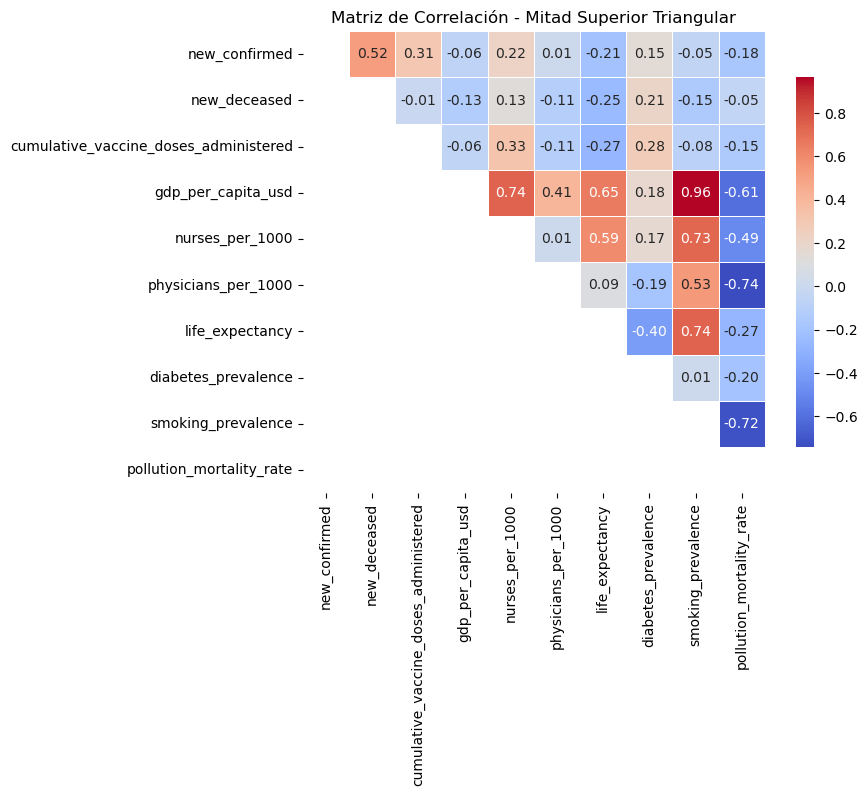

In [22]:
# Selección de columnas numéricas relevantes (puedes ajustar)
cols = ['new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered',
        'gdp_per_capita_usd', 'nurses_per_1000', 'physicians_per_1000',
        'life_expectancy', 'diabetes_prevalence', 'smoking_prevalence', 'pollution_mortality_rate']

# Calcular matriz de correlación
corr = data_final[cols].corr()

# Crear máscara para la mitad inferior (para mostrar solo la superior)
mask = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})

plt.title('Matriz de Correlación - Mitad Superior Triangular')
plt.show()

### ¿Por qué no usar todas las columnas?

1. Redundancia: Muchas variables están altamente correlacionadas entre sí (por ejemplo: population, population_male, population_female).

2. Columnas categóricas: country_name, location_key, date no tienen sentido en correlaciones numéricas.

3. Variables constantes o estáticas: Algunas no cambian en el tiempo por país (ej: area_sq_km, population_density en países completos).

4. Ruido innecesario: Incluir demasiadas columnas puede dificultar interpretar relaciones clave en el gráfico.

### Algunas conclusiones

1. Relación positiva fuerte entre casos confirmados y decesos:
La correlación entre new_confirmed y new_deceased es alta y positiva, lo que indica que al aumentar los casos confirmados de COVID-19, también aumentan los fallecimientos. Esto es esperado y confirma la gravedad de la pandemia en las regiones analizadas.

2. Impacto de la vacunación:
La variable cumulative_vaccine_doses_administered muestra una correlación negativa con los nuevos fallecimientos y casos nuevos, aunque puede no ser muy fuerte. Esto sugiere que a medida que se aplican más dosis de vacunas, la incidencia y mortalidad tienden a disminuir, lo que refleja la efectividad de la vacunación.

3. Indicadores socioeconómicos y salud:
Variables como gdp_per_capita_usd, nurses_per_1000, physicians_per_1000 y life_expectancy presentan correlaciones positivas entre sí, indicando que países con mayor ingreso per cápita suelen tener mejores infraestructuras sanitarias y mayor expectativa de vida.
Además, estas variables tienden a correlacionarse negativamente con tasas de mortalidad y casos, lo que puede indicar que mayor desarrollo socioeconómico está asociado a mejores resultados en salud frente al COVID-19.

4. Factores de riesgo y condiciones preexistentes:
La prevalencia de diabetes (diabetes_prevalence) y tabaquismo (smoking_prevalence) muestra correlaciones positivas con la mortalidad por contaminación y, en algunos casos, con las muertes por COVID-19, lo que apunta a que estos factores pueden aumentar el riesgo de complicaciones.

5. Indicadores ambientales:
La tasa de mortalidad por contaminación (pollution_mortality_rate) está correlacionada positivamente con factores de riesgo y mortalidad, lo que resalta la importancia del ambiente en la salud pública y cómo puede influir en la severidad del COVID-19.


## Gráficos

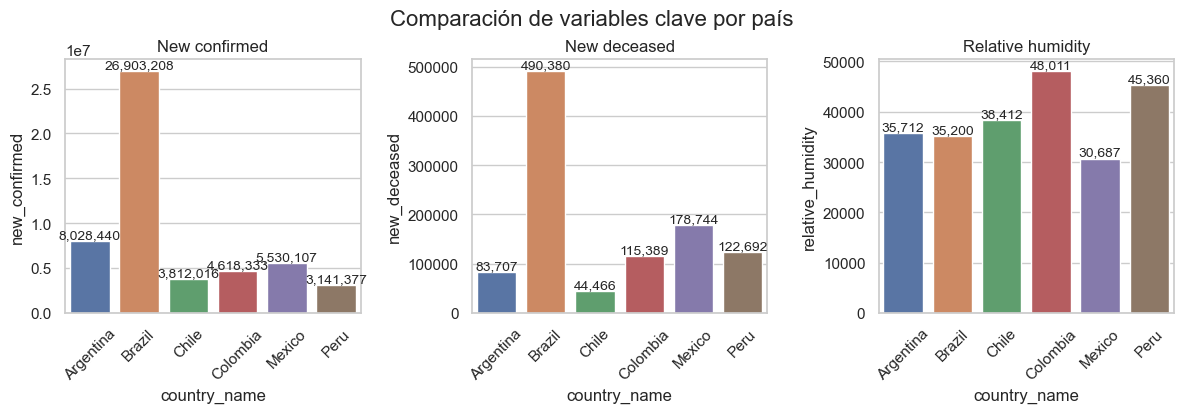

In [30]:
## 1. Gráficos de barras de países contra el resto de variables.

# Estilo y variables
sns.set(style="whitegrid")
variables = [
    'new_confirmed', 'new_deceased','relative_humidity'
]

# Promedios por país en orden alfabético
data_pais = data_final.groupby('country_name')[variables].sum().reset_index()
orden = sorted(data_pais['country_name'].unique())

# Subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.barplot(x='country_name', y=var, data=data_pais, ax=axes[i], order=orden)
    axes[i].set_title(var.replace('_', ' ').capitalize(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Etiquetas
    for p in axes[i].patches:
        val = p.get_height()
        axes[i].annotate(f'{val:,.0f}' if val >= 10 else f'{val:.2f}',
                         (p.get_x() + p.get_width()/2, val),
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.suptitle('Comparación de variables clave por país', fontsize=16, y=1.03)
plt.show()

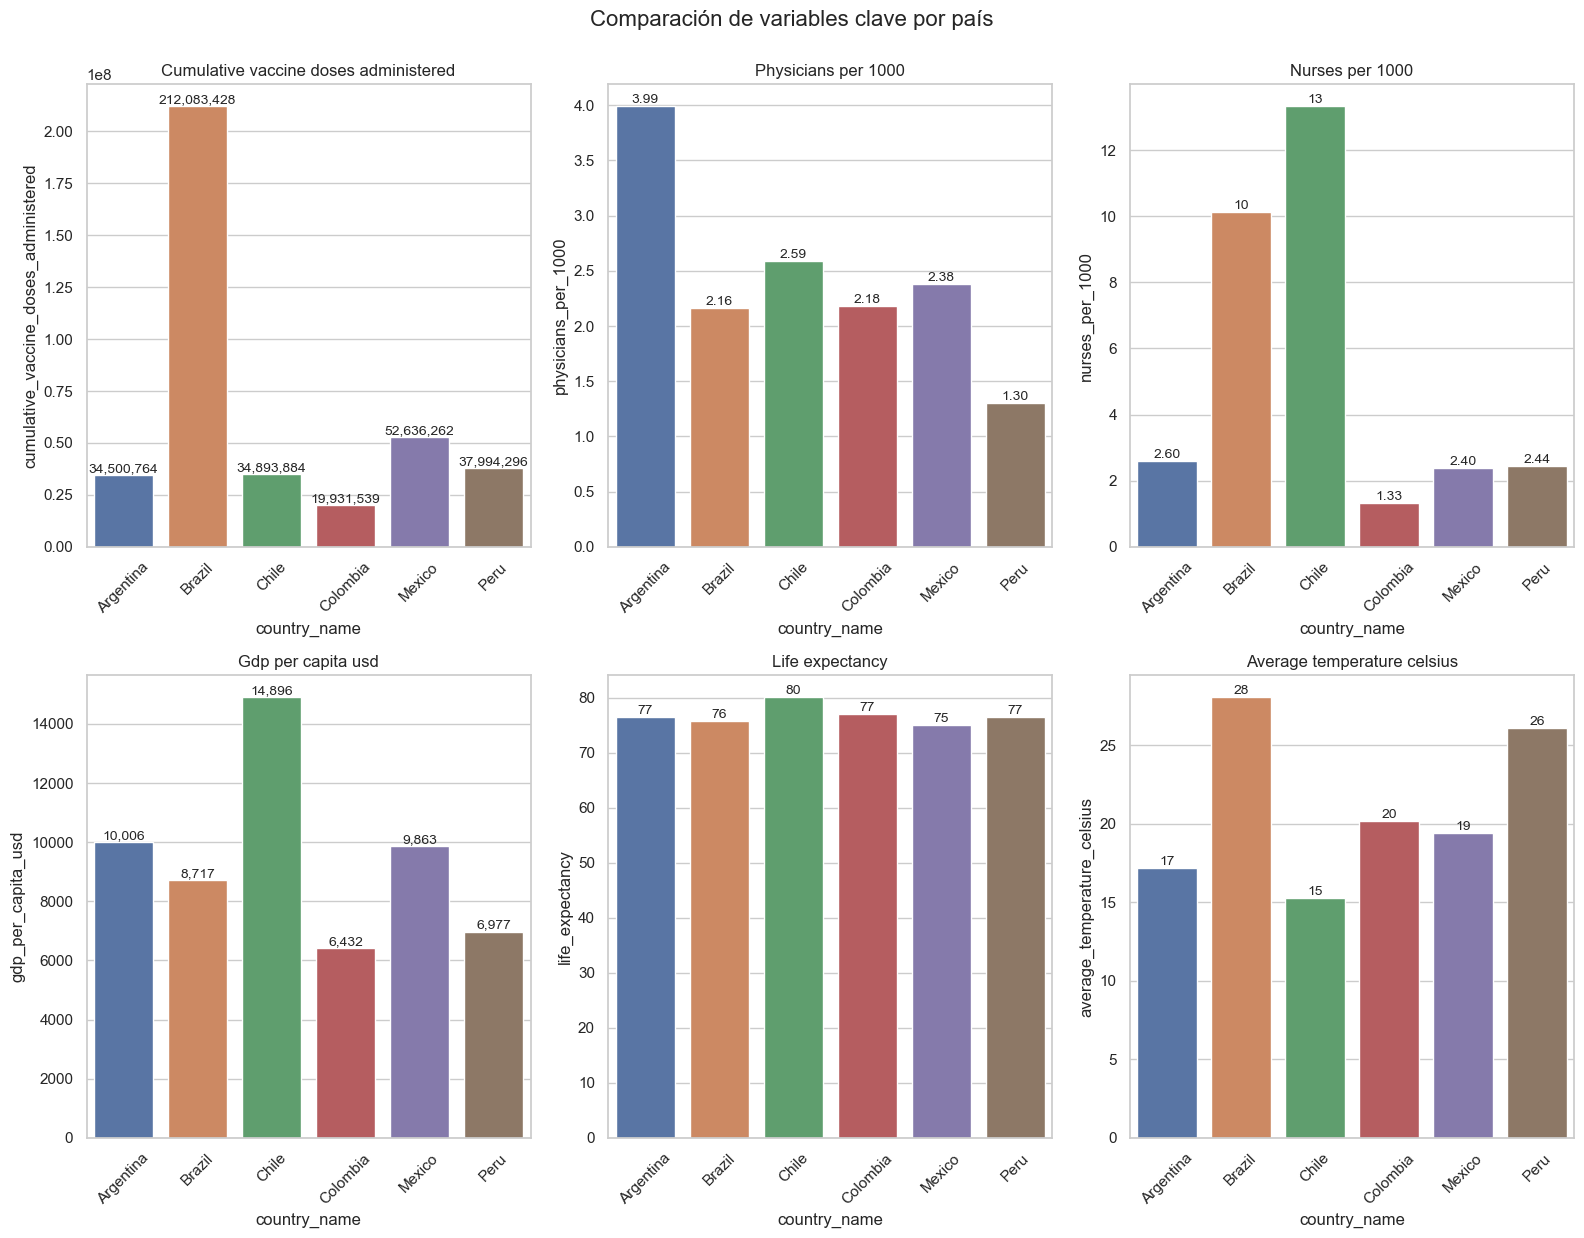

In [29]:

# Estilo y variables
sns.set(style="whitegrid")
variables = [
     'cumulative_vaccine_doses_administered', 'physicians_per_1000', 'nurses_per_1000',
     'gdp_per_capita_usd','life_expectancy', 'average_temperature_celsius'
]

# Promedios por país en orden alfabético
data_pais = data_final.groupby('country_name')[variables].mean().reset_index()
orden = sorted(data_pais['country_name'].unique())

# Subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.barplot(x='country_name', y=var, data=data_pais, ax=axes[i], order=orden)
    axes[i].set_title(var.replace('_', ' ').capitalize(), fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Etiquetas
    for p in axes[i].patches:
        val = p.get_height()
        axes[i].annotate(f'{val:,.0f}' if val >= 10 else f'{val:.2f}',
                         (p.get_x() + p.get_width()/2, val),
                         ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.suptitle('Comparación de variables clave por país', fontsize=16, y=1.03)
plt.show()

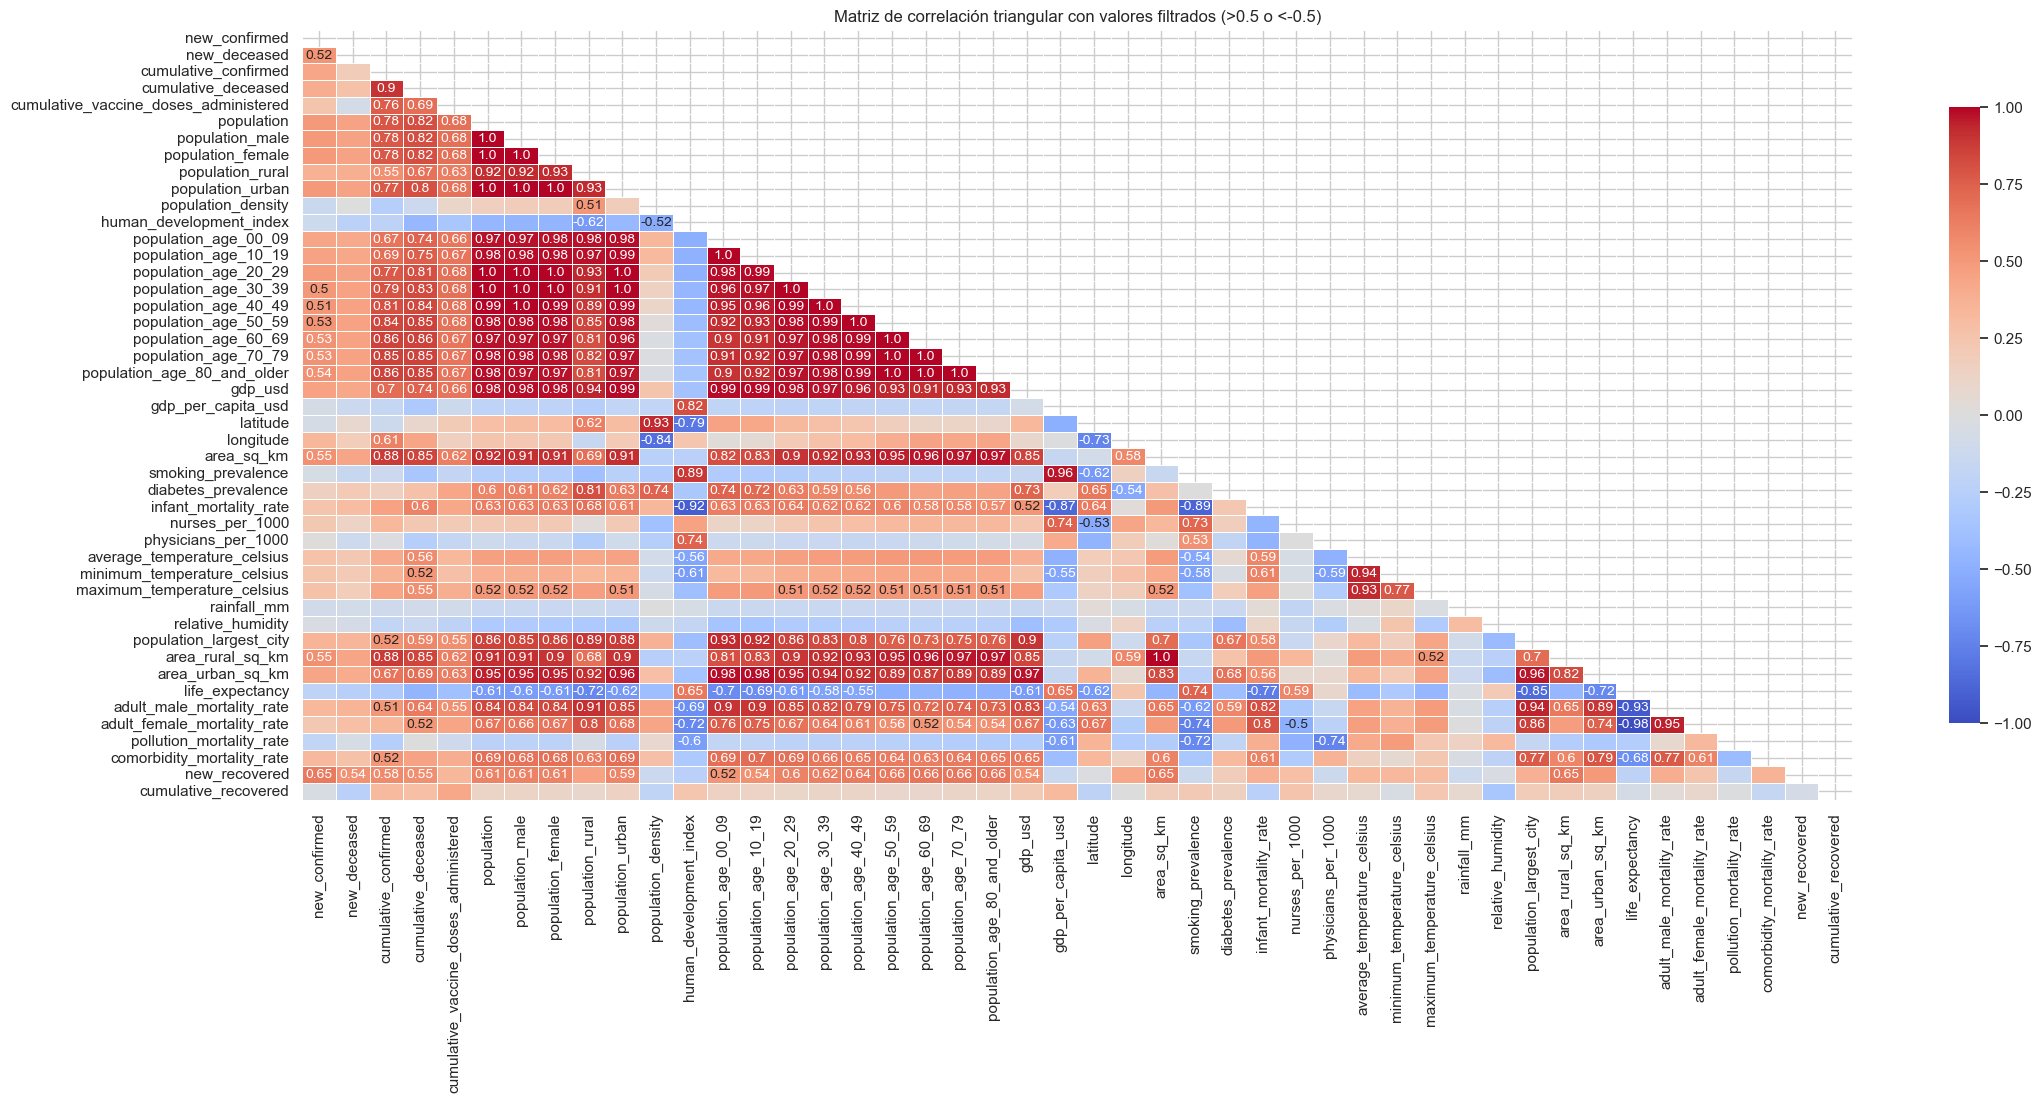

In [57]:
## 2. Matriz de correlación con submáscara y filtro para valores > 0.5
# Calcular la matriz de correlación
corr = data_final.select_dtypes(include=['float64', 'int64']).corr()

# Crear máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crear un mapa de calor
plt.figure(figsize=(25, 10))
sns.heatmap(corr, 
            mask=mask, 
            cmap='coolwarm', 
            vmin=-1, vmax=1, 
            cbar_kws={"shrink": .8}, 
            linewidths=0.5, 
            annot=np.where(abs(corr.values) > 0.5, np.round(corr.values, 2), ""), 
            fmt='', 
            annot_kws={"size": 10})

plt.title('Matriz de correlación triangular con valores filtrados (>0.5 o <-0.5)')
plt.show()

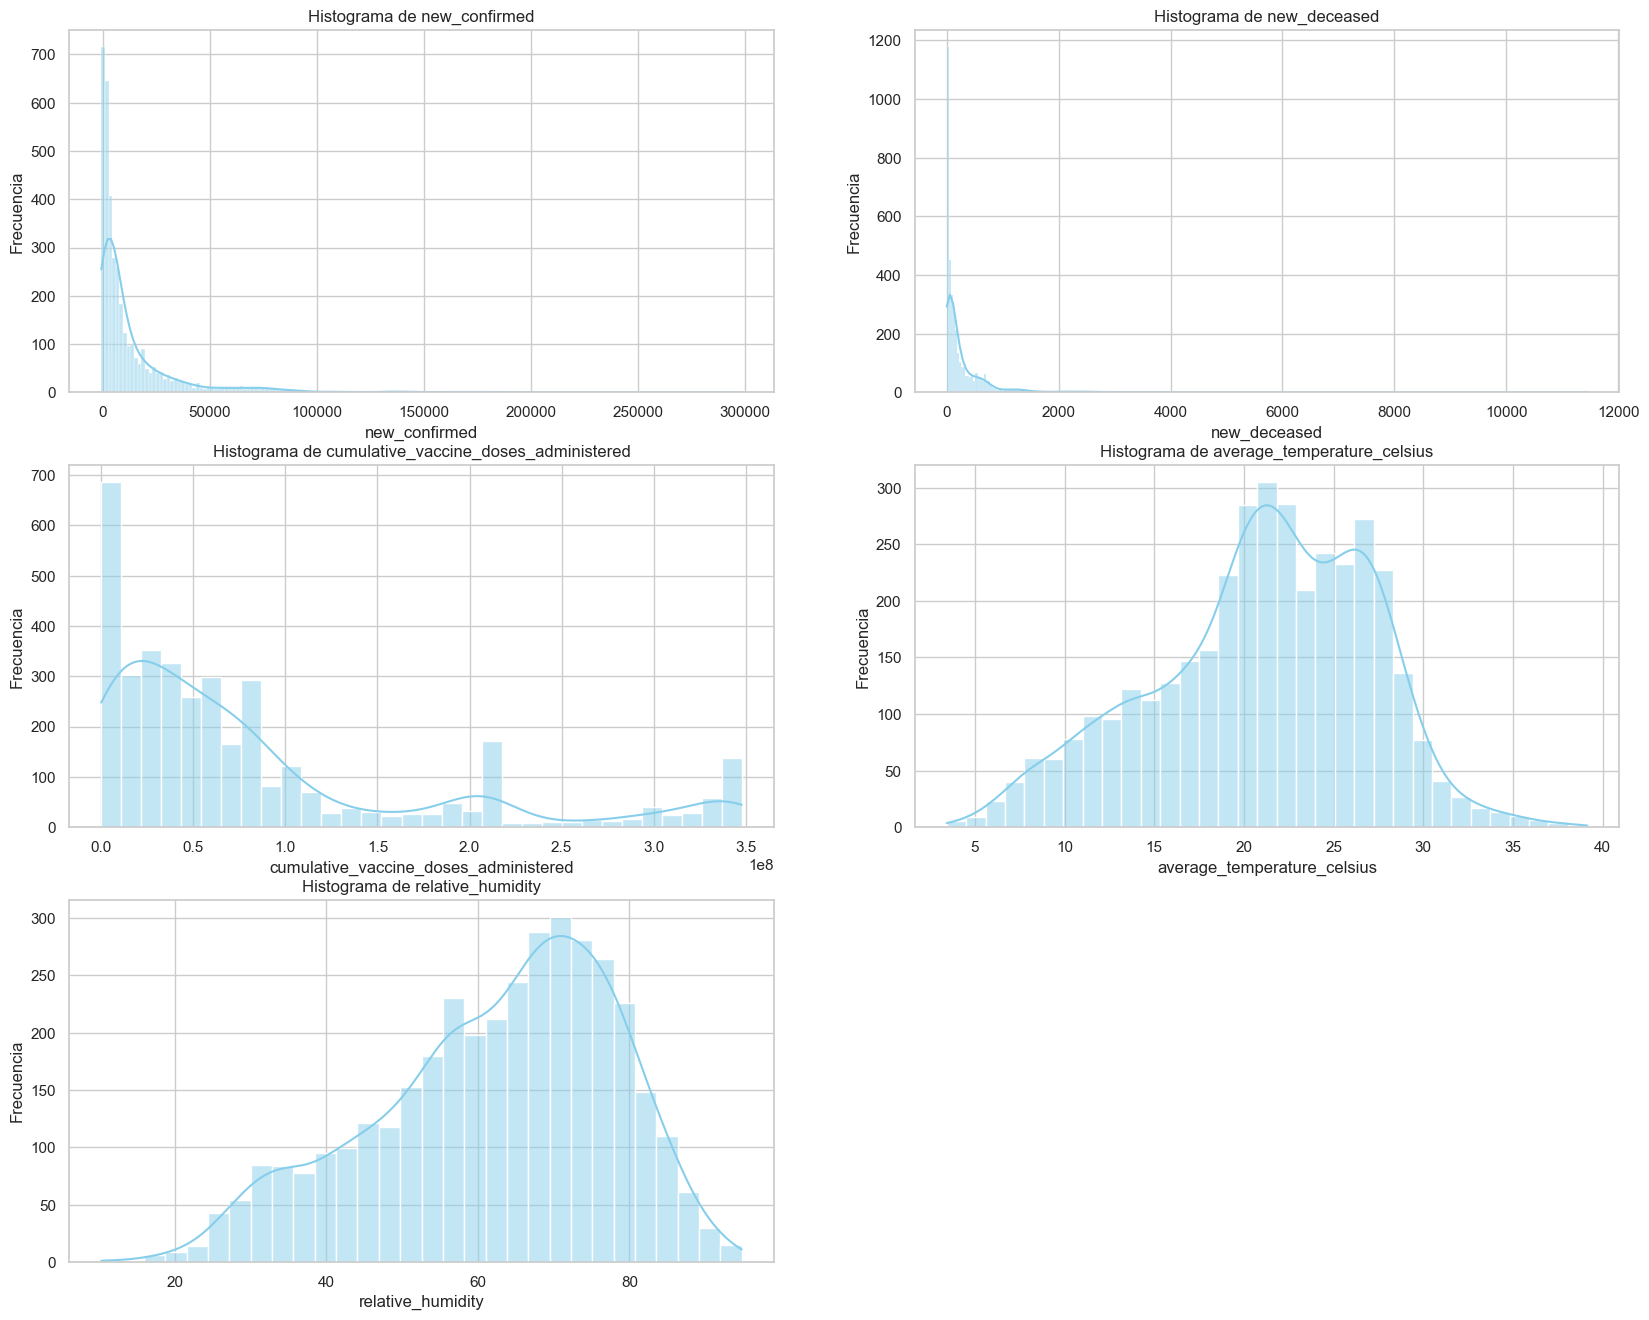

In [60]:
## 3. Histogramas de variables que tienen cambios (ejemplo: new_confirmed y new_deceased)

sns.set(style="whitegrid")

cols = [
    'new_confirmed', 'new_deceased', 'cumulative_vaccine_doses_administered',
    'average_temperature_celsius', 'relative_humidity'
]

plt.figure(figsize=(20, 16))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data_final[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Histograma de {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.show()

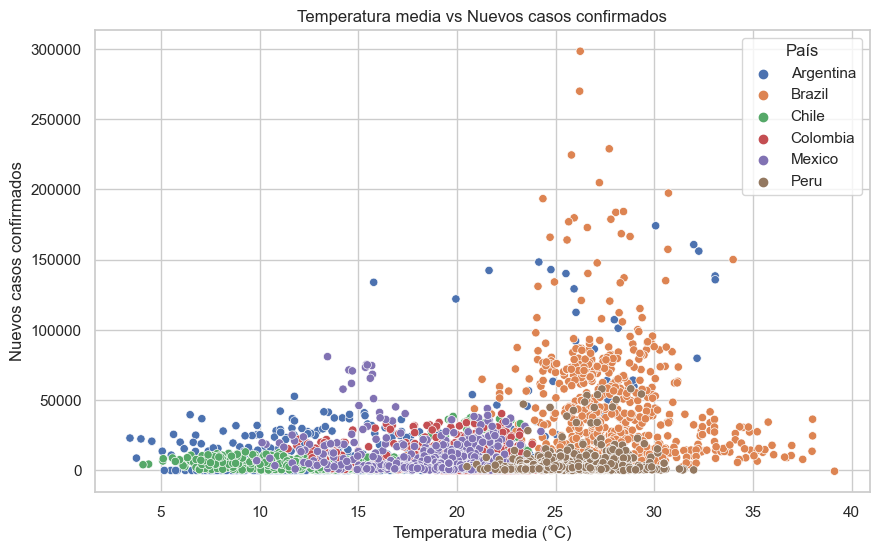

In [61]:
## 4. Diagrama de dispersión: temperatura media vs casos confirmados

plt.figure(figsize=(10,6)) #crea la figura
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', hue='country_name', data=data_final)

## titulos
plt.title('Temperatura media vs Nuevos casos confirmados')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Nuevos casos confirmados')
plt.legend(title='País')
plt.show()

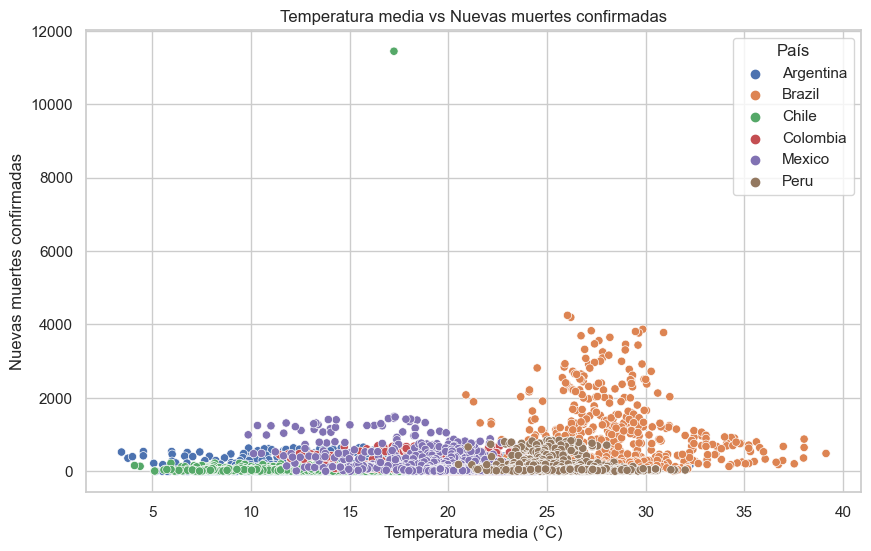

In [62]:
## 5. Diagrama de dispersión: temperatura media vs muertes confirmadas
plt.figure(figsize=(10,6)) # crea la figura

sns.scatterplot(x='average_temperature_celsius', y='new_deceased', hue='country_name', data=data_final)

#titulos
plt.title('Temperatura media vs Nuevas muertes confirmadas')
plt.xlabel('Temperatura media (°C)')
plt.ylabel('Nuevas muertes confirmadas')
plt.legend(title='País')
plt.show()

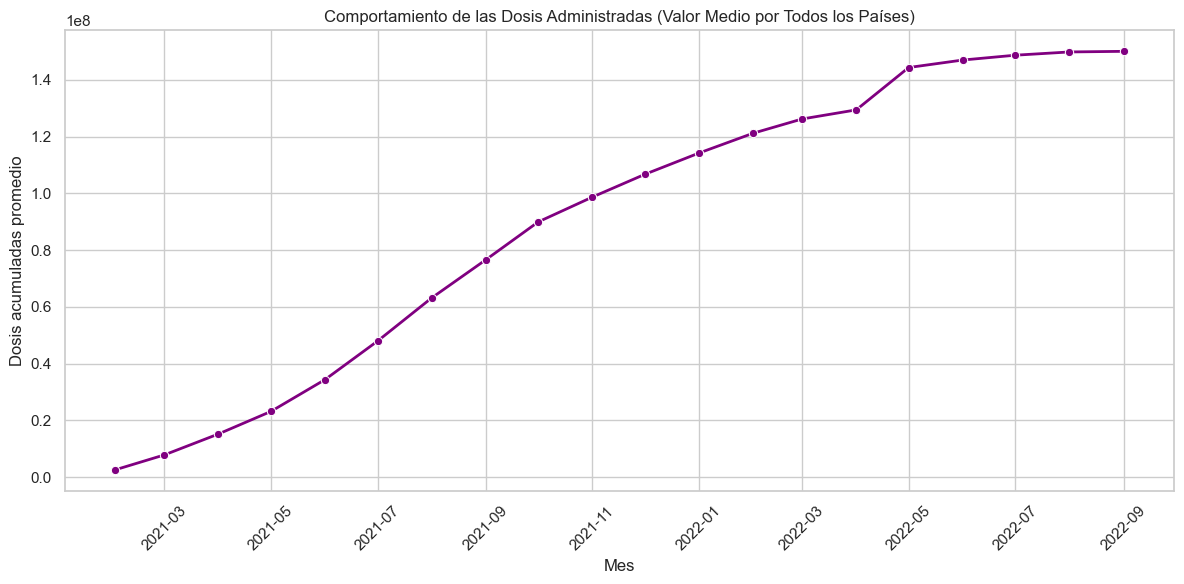

In [64]:
## 6.  Comportamiento de las dosis administradas de todos los países .
# Asegurar formato datetime y columna de mes
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')
data_final['mes'] = data_final['date'].dt.to_period('M')

# Obtener el último registro de cada mes por país
ultimos = data_final.sort_values('date').groupby(['country_name', 'mes']).tail(1)

# Convertir periodo a timestamp
ultimos['mes_dt'] = ultimos['mes'].dt.to_timestamp()

#  Calcular la media de dosis administradas por mes (todos los países)
promedio_mensual = (
    ultimos.groupby('mes_dt')['cumulative_vaccine_doses_administered']
    .mean()
    .reset_index(name='dosis_promedio')
)

#  Filtrar desde febrero 2021
promedio_mensual = promedio_mensual[promedio_mensual['mes_dt'] >= '2021-02-01']

# 📊 Graficar
plt.figure(figsize=(12,6))
sns.lineplot(data=promedio_mensual, x='mes_dt', y='dosis_promedio', marker='o', linewidth=2, color='purple')
plt.title('Comportamiento de las Dosis Administradas (Valor Medio por Todos los Países)')
plt.ylabel('Dosis acumuladas promedio')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



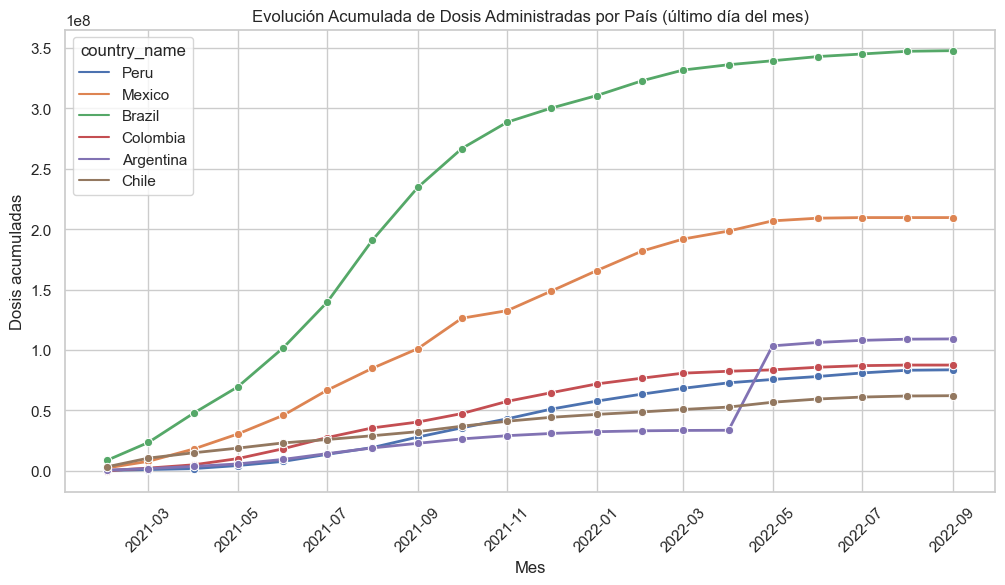

In [65]:
## 7. Evolución de dosis administradas por mes de cada país

# Aseguramos formato de fecha
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Crear columna de mes
data_final['mes'] = data_final['date'].dt.to_period('M')

# Tomar el último registro de cada mes por país
ultimos = data_final.sort_values('date').groupby(['country_name', 'mes']).tail(1)

# Convertimos el período a timestamp
ultimos['mes_dt'] = ultimos['mes'].dt.to_timestamp()

# 🔹 FILTRAR para que empiece desde 2021-02
ultimos = ultimos[ultimos['mes_dt'] >= '2021-02-01']

# Graficar acumulado mensual
plt.figure(figsize=(12,6))
sns.lineplot(data=ultimos, x='mes_dt', y='cumulative_vaccine_doses_administered', hue='country_name', linewidth=2, marker='o')
plt.title('Evolución Acumulada de Dosis Administradas por País (último día del mes)')
plt.ylabel('Dosis acumuladas')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

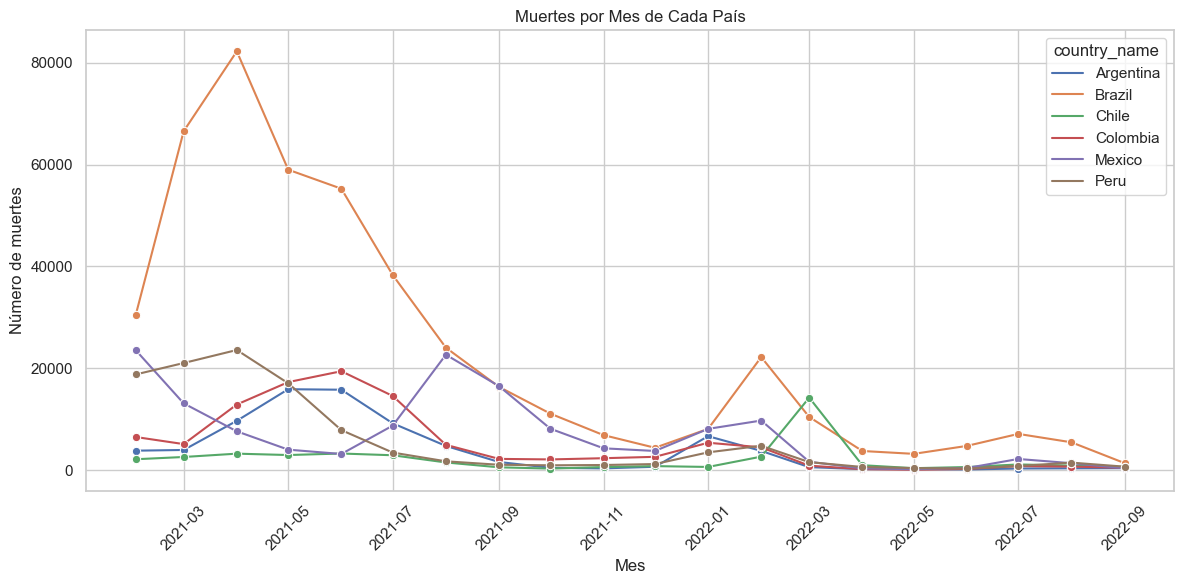

In [66]:
# 8. Muertes por mes de cada país.

# Asegurarse del tipo datetime
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Crear columna de mes
data_final['mes'] = data_final['date'].dt.to_period('M')

# Agrupar por país y mes, sumando muertes nuevas
muertes_mensuales = (
    data_final.groupby(['country_name', 'mes'])['new_deceased']
    .sum()
    .reset_index()
)

# Convertir período a datetime para graficar
muertes_mensuales['mes_dt'] = muertes_mensuales['mes'].dt.to_timestamp()

# Filtrar desde 2021-02 si se desea
muertes_mensuales = muertes_mensuales[muertes_mensuales['mes_dt'] >= '2021-02-01']

# 📊 Gráfica
plt.figure(figsize=(12,6))
sns.lineplot(data=muertes_mensuales, x='mes_dt', y='new_deceased', hue='country_name', marker='o')
plt.title('Muertes por Mes de Cada País')
plt.xlabel('Mes')
plt.ylabel('Número de muertes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

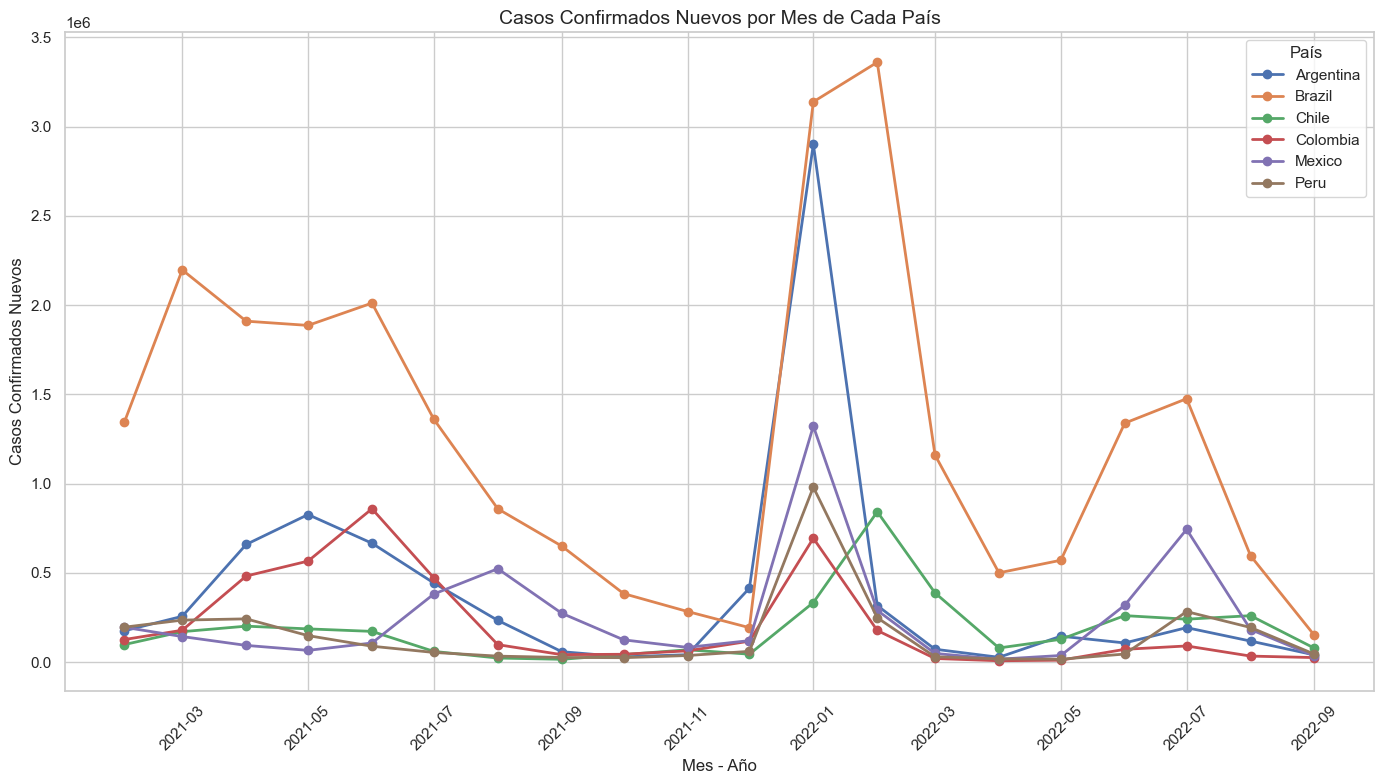

In [67]:
## 9. Casos confirmados por mes de cada país
# Crear columna año-mes para agrupar
data_final['year_month'] = data_final['date'].dt.to_period('M')

# Agrupar por país y mes, sumando casos confirmados nuevos
casos_confirmados_mensual = data_final.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()

# Convertir 'year_month' a datetime para graficar
casos_confirmados_mensual['year_month'] = casos_confirmados_mensual['year_month'].dt.to_timestamp()

# Filtrar desde febrero de 2021
casos_confirmados_mensual = casos_confirmados_mensual[casos_confirmados_mensual['year_month'] >= '2021-02-01']

# Gráfica
plt.figure(figsize=(14,8))
for pais in casos_confirmados_mensual['country_name'].unique():
    subset = casos_confirmados_mensual[casos_confirmados_mensual['country_name'] == pais]
    plt.plot(subset['year_month'], subset['new_confirmed'], label=pais, marker='o', linewidth=2)

plt.title('Casos Confirmados Nuevos por Mes de Cada País', fontsize=14)
plt.xlabel('Mes - Año', fontsize=12)
plt.ylabel('Casos Confirmados Nuevos', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(True)
plt.tight_layout()
plt.show()

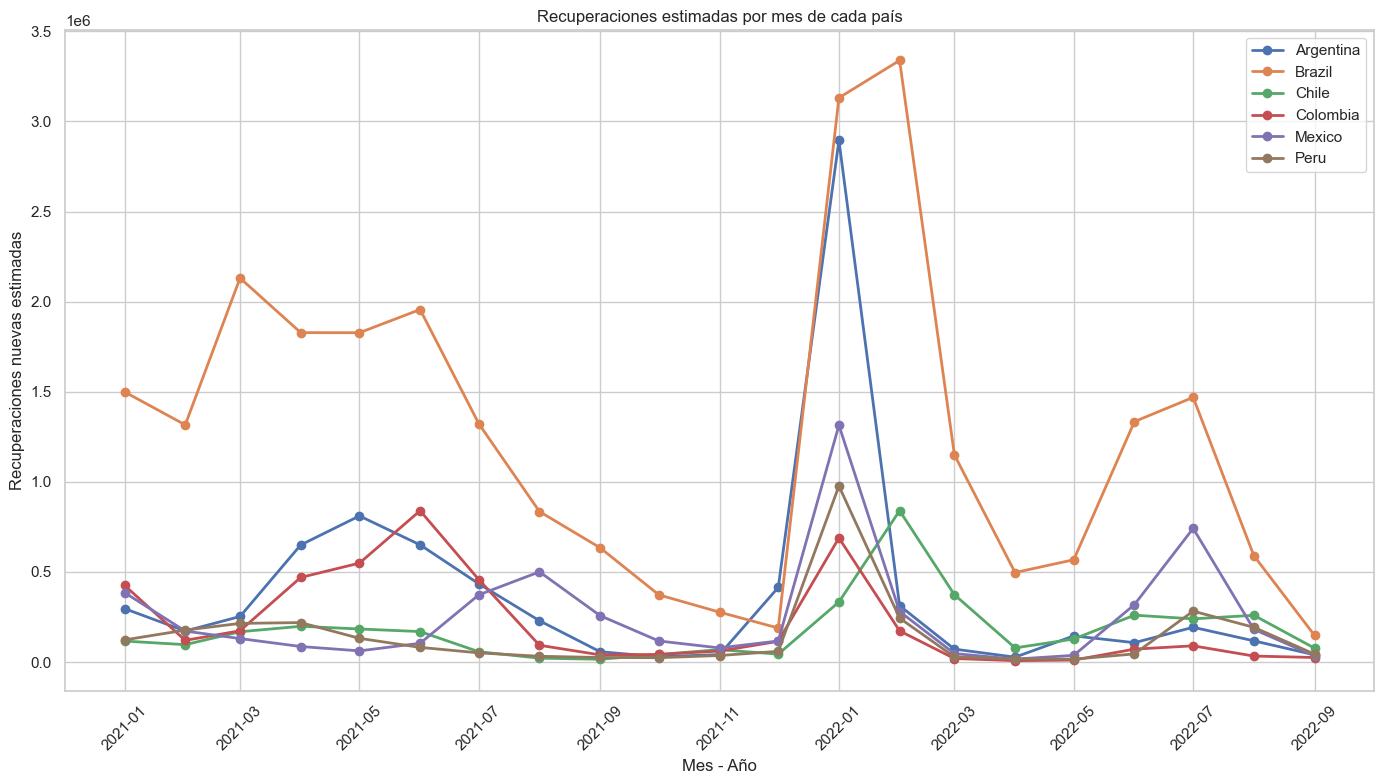

In [68]:
## 10. Recuperaciones de casos por mes de cada país
# Crear columna de recuperaciones estimadas
data_final['estimated_new_recovered'] = data_final['new_confirmed'] - data_final['new_deceased']

# Asegurar que 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'], errors='coerce')

# Crear columna de año-mes
data_final['year_month'] = data_final['date'].dt.to_period('M')

# Agrupar por país y mes, sumando recuperaciones estimadas
recuperados_mensual = (
    data_final.groupby(['country_name', 'year_month'])['estimated_new_recovered']
    .sum()
    .reset_index()
)

# Convertir 'year_month' a datetime para graficar
recuperados_mensual['year_month'] = recuperados_mensual['year_month'].dt.to_timestamp()

# Graficar
plt.figure(figsize=(14, 8))

for pais in recuperados_mensual['country_name'].unique():
    subset = recuperados_mensual[recuperados_mensual['country_name'] == pais]
    plt.plot(subset['year_month'], subset['estimated_new_recovered'],
             label=pais, linewidth=2, marker='o')

plt.title('Recuperaciones estimadas por mes de cada país')
plt.xlabel('Mes - Año')
plt.ylabel('Recuperaciones nuevas estimadas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                                                   

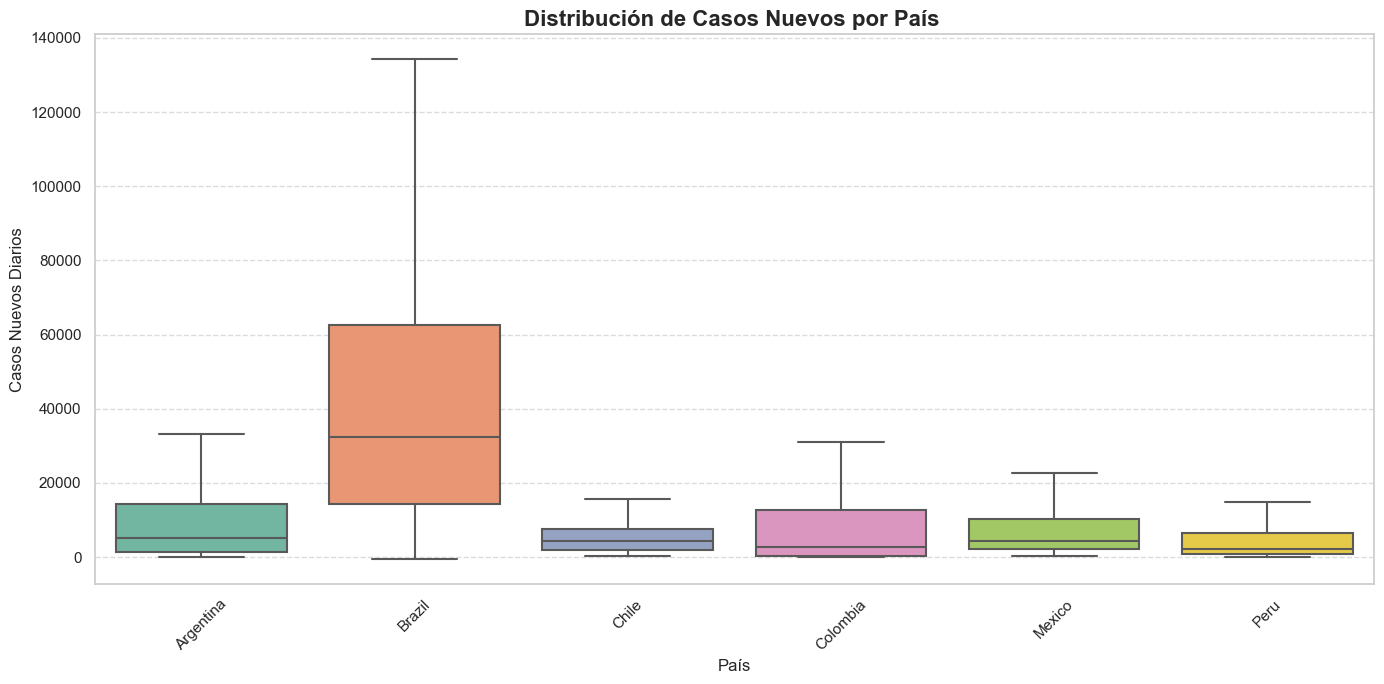

In [69]:
## 11. Comparación del Número de Casos Nuevos entre Países (boxplot)

# Estilo profesional
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(14, 7))

# Boxplot
ax = sns.boxplot(
    data=data_final,
    x='country_name',
    y='new_confirmed',
    palette='Set2',
    showfliers=False  # Ocultar outliers para hacerlo más limpio
)

# Títulos y etiquetas
plt.title('Distribución de Casos Nuevos por País ', fontsize=16, weight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Casos Nuevos Diarios', fontsize=12)
plt.xticks(rotation=45)

# Mejorar estilo del fondo
ax.set_facecolor('white')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste final
plt.tight_layout()
plt.show()

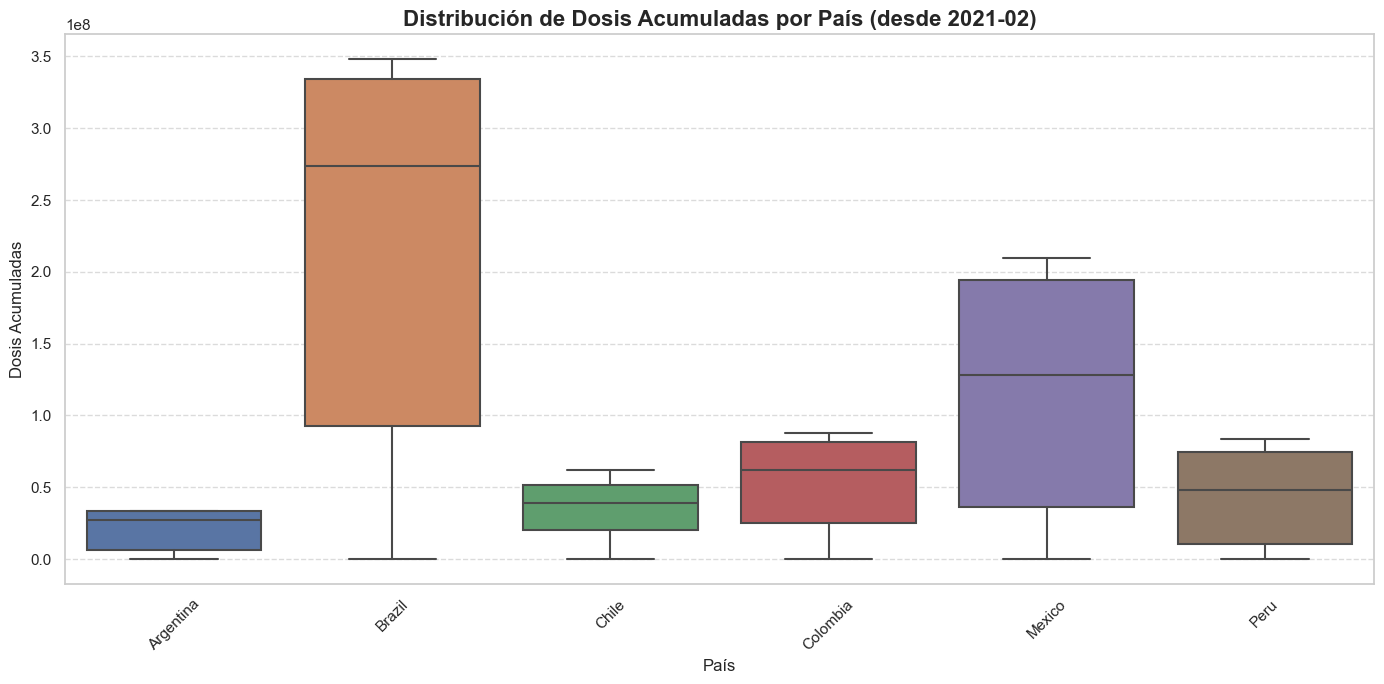

In [71]:
## 12. Dosis acumuladas por país (boxplot)

# Estilo
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(14, 7))

# Boxplot
ax = sns.boxplot(
    data=data_final,
    x='country_name',
    y='cumulative_vaccine_doses_administered',
    showfliers=False  # Oculta outliers para hacerlo más legible
)

# Etiquetas y título
plt.title('Distribución de Dosis Acumuladas por País (desde 2021-02)', fontsize=16, weight='bold')
plt.xlabel('País', fontsize=12)
plt.ylabel('Dosis Acumuladas', fontsize=12)
plt.xticks(rotation=45)

# Mejoras visuales
ax.set_facecolor('white')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajuste
plt.tight_layout()
plt.show()

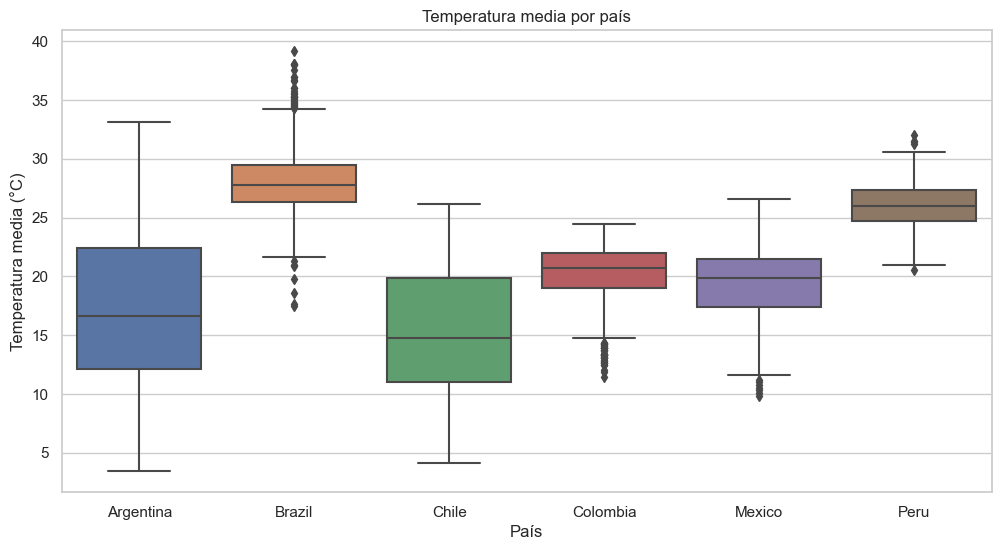

In [72]:
## 13.Boxplot de temperatura media por país
plt.figure(figsize=(12,6))
sns.boxplot(x='country_name', y='average_temperature_celsius', data=data_final)
plt.title('Temperatura media por país')
plt.xlabel('País')
plt.ylabel('Temperatura media (°C)')
plt.show()

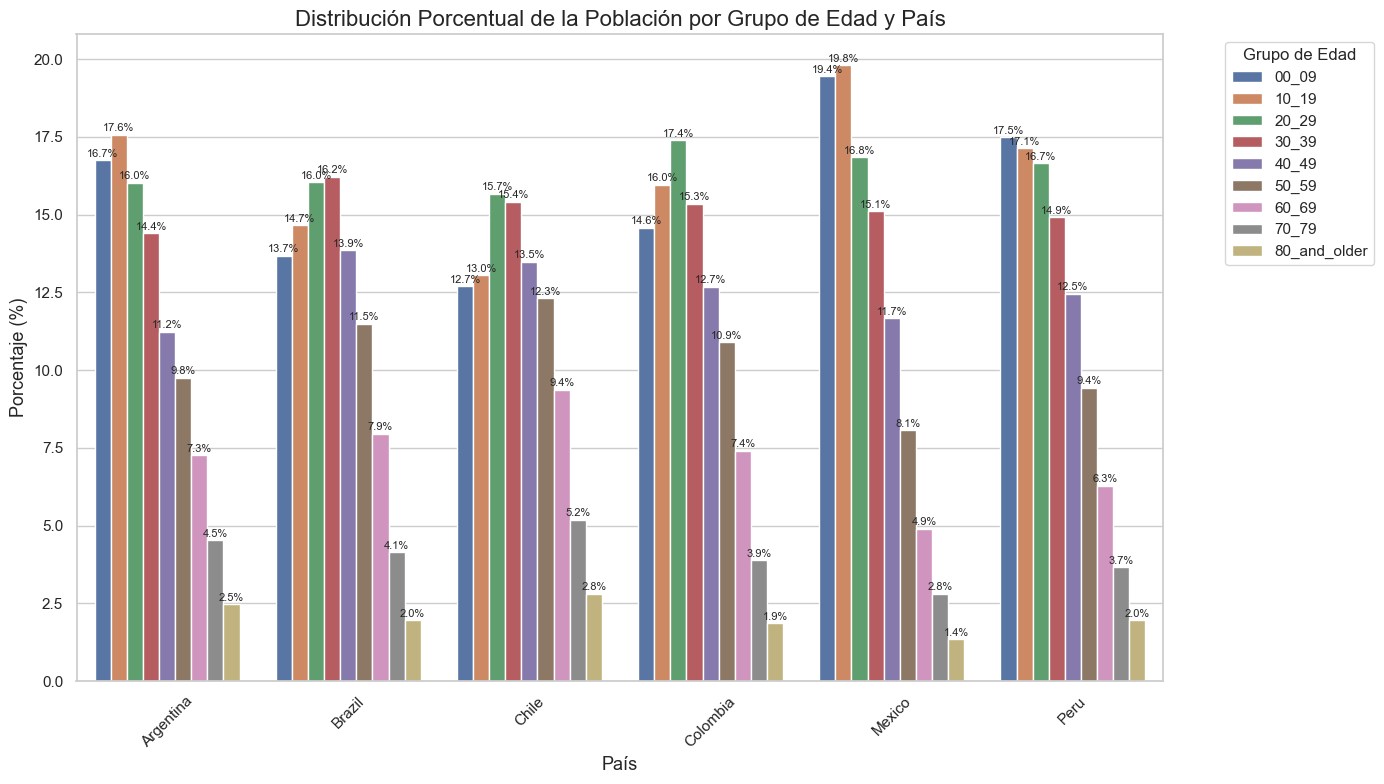

In [73]:
## 15. Distribución de la población por grupos de edad (usar las columnas de población por edad)

# Columnas de edad
edad_cols = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

## Agrupar por país y sumar para tener totales promedio
poblacion_edad = data_final.groupby('country_name')[edad_cols].mean().reset_index()

# Calcular total de población por país (lass edades)
poblacion_edad['total'] = poblacion_edad[edad_cols].sum(axis=1)

## Convertir a porcentaje respecto al total por país
for col in edad_cols:
    poblacion_edad[col] = (poblacion_edad[col] / poblacion_edad['total']) * 100
    
poblacion_edad = poblacion_edad.rename(columns=lambda x: x.replace('population_age_', '') if 'population_age' in x else x)   # Renombrar columnas

df_melted = poblacion_edad.drop(columns='total').melt( id_vars='country_name', var_name='Grupo de Edad', value_name='Porcentaje')   # Reorganizando

# Crear gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_melted, x='country_name', y='Porcentaje', hue='Grupo de Edad')

# Agregar etiquetas en porcentaje sobre cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=8, padding=1)

# Ajustes
plt.title('Distribución Porcentual de la Población por Grupo de Edad y País', fontsize=16)
plt.xlabel('País', fontsize=13)
plt.ylabel('Porcentaje (%)', fontsize=13)
plt.xticks(rotation=45)
plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

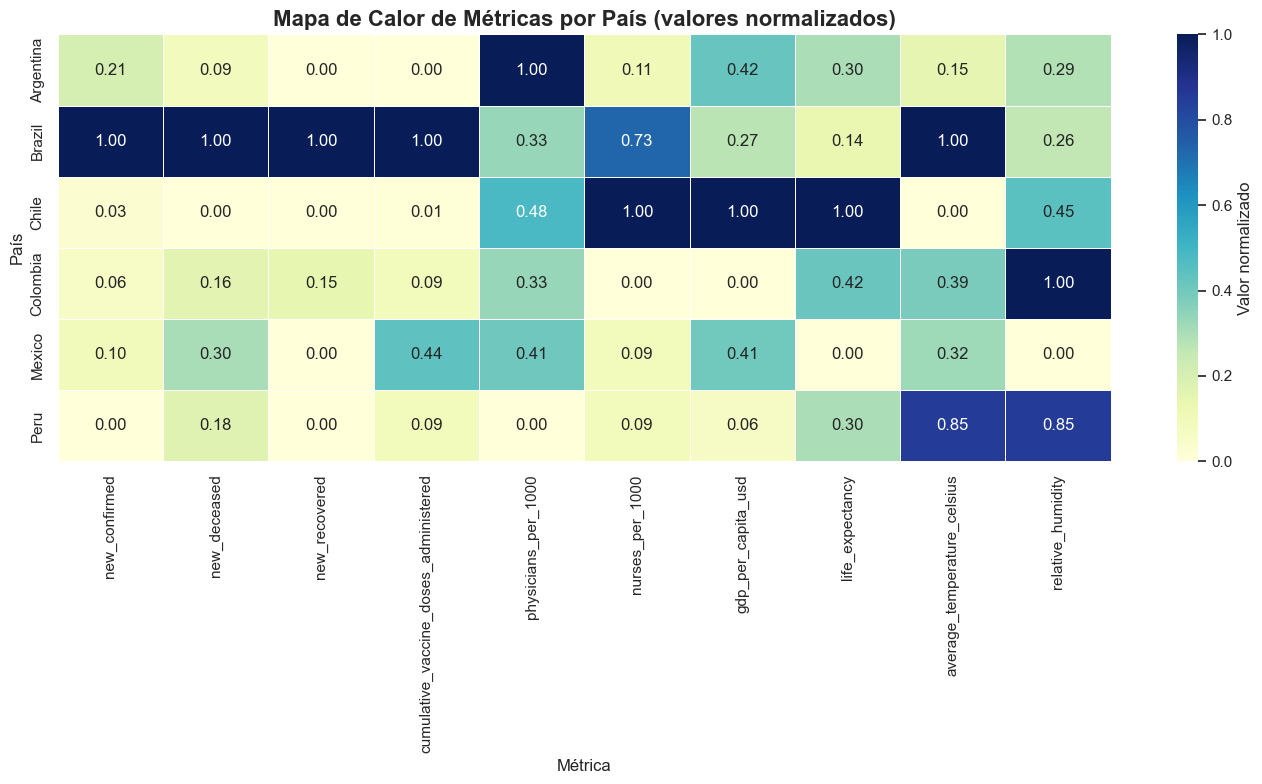

In [74]:
## 16.Mapa de calor de métricas promedio por país
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar variables numéricas relevantes para el análisis
variables_metrica = [
    'new_confirmed', 'new_deceased', 'new_recovered',
    'cumulative_vaccine_doses_administered',
    'physicians_per_1000', 'nurses_per_1000',
    'gdp_per_capita_usd', 'life_expectancy',
    'average_temperature_celsius', 'relative_humidity'
]

# Agrupado por país y se calcula el promedio 
resumen_pais = data_final.groupby('country_name')[variables_metrica].mean().round(1)

# Normalizar 
resumen_normalizado = (resumen_pais - resumen_pais.min()) / (resumen_pais.max() - resumen_pais.min())

# Crear el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(resumen_normalizado, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Valor normalizado'})

plt.title('Mapa de Calor de Métricas por País (valores normalizados)', fontsize=16, weight='bold')
plt.xlabel('Métrica')
plt.ylabel('País')
plt.tight_layout()
plt.show()

Si está claro en new_deceased, significa que tuvo pocas muertes nuevas en comparación.

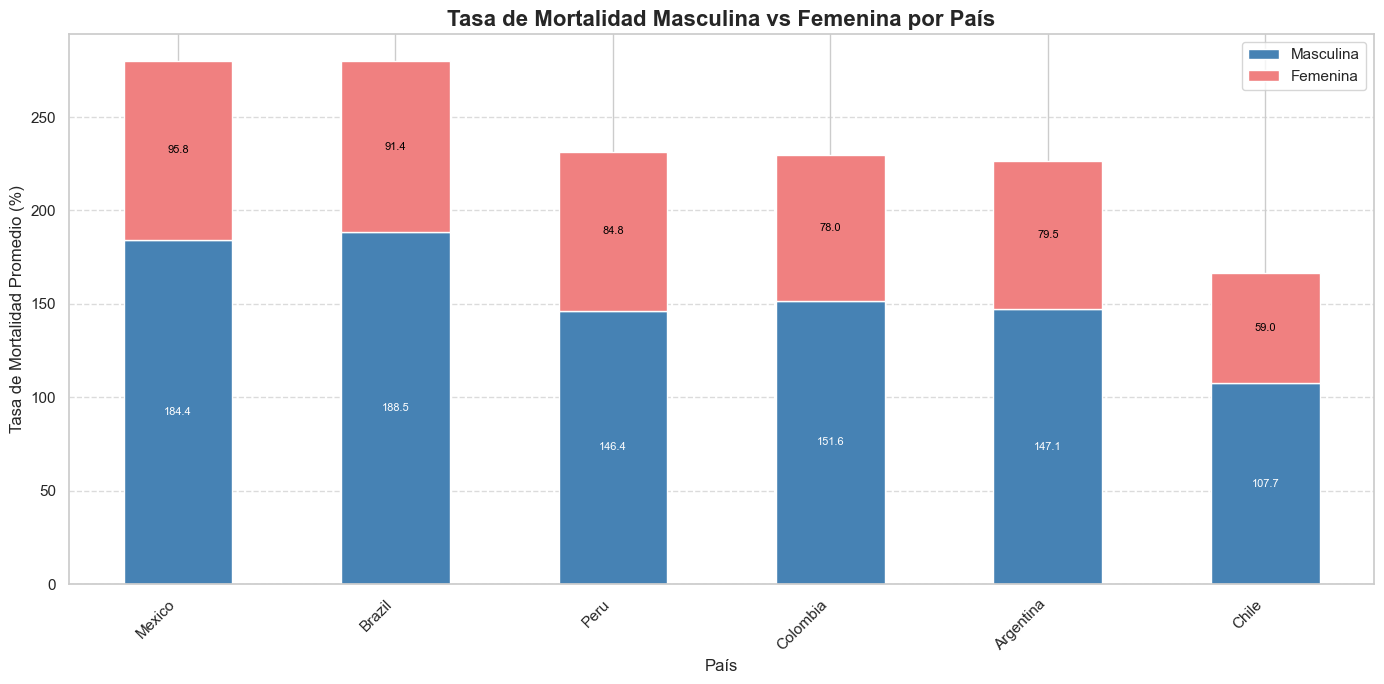

In [155]:
## 17.Diagrama de barras apilado de mortalidad masculina vs femenina por país
# Agrupamos y calculamos tasas promedio
mortalidad = data_final.groupby('country_name')[['adult_male_mortality_rate', 'adult_female_mortality_rate']].mean()

# Ordenamos por mortalidad total promedio
mortalidad['total'] = mortalidad['adult_male_mortality_rate'] + mortalidad['adult_female_mortality_rate']
mortalidad = mortalidad.sort_values('total', ascending=False).drop(columns='total')

# Gráfico apilado
ax = mortalidad.plot(kind='bar', stacked=True, figsize=(14, 7), color=['steelblue', 'lightcoral'])

plt.title('Tasa de Mortalidad Masculina vs Femenina por País', fontsize=16, weight='bold')
plt.xlabel('País')
plt.ylabel('Tasa de Mortalidad Promedio (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(['Masculina', 'Femenina'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas
for i, country in enumerate(mortalidad.index):
    male_val = mortalidad.loc[country, 'adult_male_mortality_rate']
    female_val = mortalidad.loc[country, 'adult_female_mortality_rate']
    
    # Etiqueta masculina (parte inferior de la barra)
    ax.text(i, male_val / 2, f'{male_val:.1f}', ha='center', va='center', color='white', fontsize=8)
    
    # Etiqueta femenina (parte superior)
    ax.text(i, male_val + (female_val / 2), f'{female_val:.1f}', ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()
plt.show()

tasa de mortalidad cada mil contagiados.

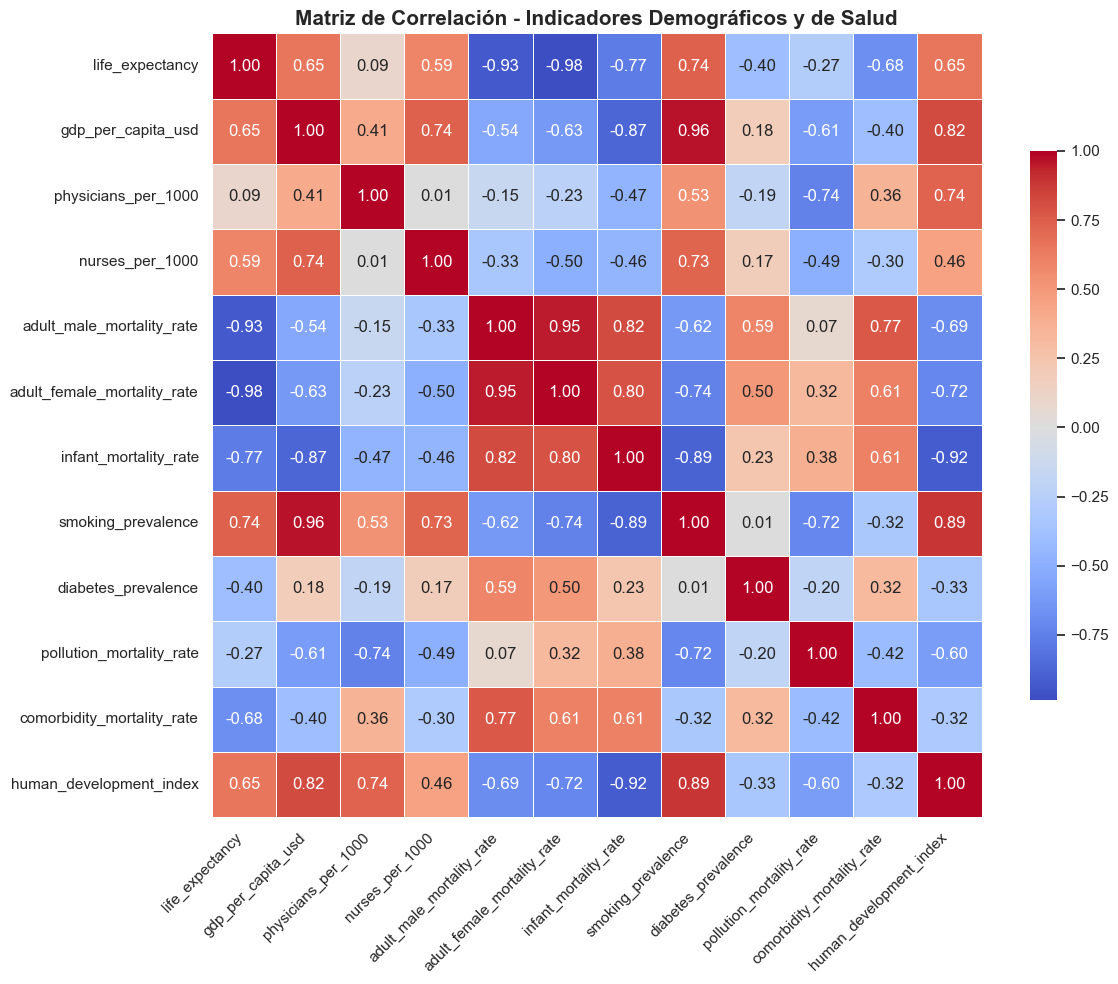

In [75]:
## 18.  Matriz de correlación de indicadores demográficos y de salud

# Variables demográficas y de salud
variables_salud = [
    'life_expectancy',
    'gdp_per_capita_usd',
    'physicians_per_1000',
    'nurses_per_1000',
    'adult_male_mortality_rate',
    'adult_female_mortality_rate',
    'infant_mortality_rate',
    'smoking_prevalence',
    'diabetes_prevalence',
    'pollution_mortality_rate',
    'comorbidity_mortality_rate',
    'human_development_index'
]

salud_df = data_final[variables_salud]

correlation_matrix = salud_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.7})
plt.title('Matriz de Correlación - Indicadores Demográficos y de Salud', fontsize=15, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

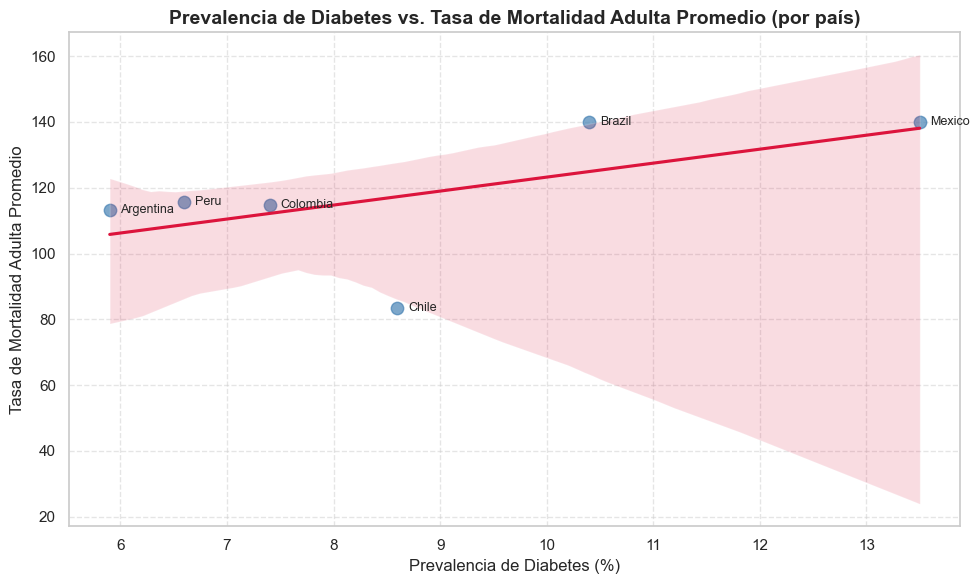

In [151]:
## 19. Comparación de la prevalencia de diabetes y la tasa de mortalidad (scatter plot con tendencia)

#  Agregar por país: promedio de prevalencia de diabetes y mortalidad adulta
df_pais = data_final.groupby('country_name').agg({ 'diabetes_prevalence': 'mean', 'adult_male_mortality_rate': 'mean', 'adult_female_mortality_rate': 'mean'}).reset_index()

# Calcular mortalidad adulta promedio (hombres + mujeres) por país
df_pais['adult_mortality_avg'] = (
    df_pais['adult_male_mortality_rate'] + df_pais['adult_female_mortality_rate']
) / 2

#  Gráfico: un punto por país y línea de tendencia
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_pais,
    x='diabetes_prevalence',
    y='adult_mortality_avg',
    scatter_kws={'s': 80, 'alpha': 0.7, 'color': 'steelblue'},
    line_kws={'color': 'crimson'}
)

# Anotar cada punto con el nombre del país
for _, row in df_pais.iterrows():
    plt.text(
        row['diabetes_prevalence'] + 0.1,  # pequeño desplazamiento en x
        row['adult_mortality_avg'],
        row['country_name'],
        fontsize=9, 
        va='center'
    )

#  Etiquetas y estilo
plt.title('Prevalencia de Diabetes vs. Tasa de Mortalidad Adulta Promedio (por país)', fontsize=14, weight='bold')
plt.xlabel('Prevalencia de Diabetes (%)', fontsize=12)
plt.ylabel('Tasa de Mortalidad Adulta Promedio', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

De forma simple se presentan algunas conculsiones que pretenden identificar tendencias y patrones en la incidencia de COVID-19 y las tasas de vacunación, incorporando además factores climáticos y geográficos. 

1. Tendencias a largo plazo de casos nuevos y vacunación.
 
 - Casos nuevos (tendencia mensual): Tendencias de contagio muestran que la mayoría tuvo picos grandes en los dos primeros meses de los años estudiados y luego bajaron para algunas regiones.  
 - Campaña de vacunación tuvo una subida brusca en 2021-03 a 2021-09, luego se estabilizó. Brasil y México lideraron en acumulado, mientras Chile y Argentina alcanzaron vacunación rápida en períodos cortos.

2. Patrones estacionales (mes a mes) en contagios y vacunaciones.

 - Patrones estacionales: Los meses de invierno en el hemisferio sur (junio-julio) tienden a tener mayor promedio de casos.
 - La vacunación se concentró más en el 2.º trimestre de 2021 (marzo-abril-mayo).

3. Comparación geográfica entre países (regiones).

 - Países más poblados (Brasil, México) son burbujas grandes: a pesar de altos casos, también aplicaron muchas dosis. Países de menor población (Chile, Perú) muestran campañas intensas concentradas en menos meses.

# Avance 3

### Carguemos librerias

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [157]:
## Asegurar que 'date' esté en formato datetime
data_final['date'] = pd.to_datetime(data_final['date'])
data_final = data_final.sort_values(['country_name', 'date']).reset_index(drop=True)

In [158]:
# para un ejemplo practico escojamos un país objetivo
pais_objetivo = 'Colombia'  
df_pais = data_final[data_final['country_name'] == pais_objetivo].copy()
df_pais.set_index('date', inplace=True)

### Inicialemnte miremos la evolución y tendencia de la serie 'nuevos casos confirmados' (new_confirmed)

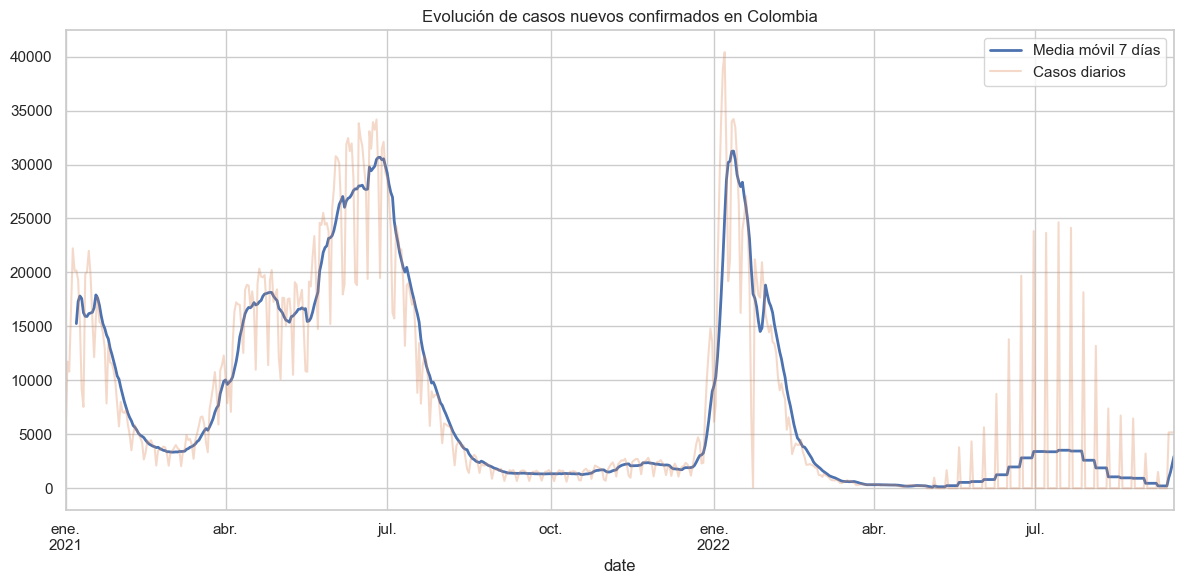

In [159]:
plt.figure(figsize=(12,6))
df_pais['new_confirmed'].rolling(window=7).mean().plot(label='Media móvil 7 días', linewidth=2)
df_pais['new_confirmed'].plot(alpha=0.3, label='Casos diarios')
plt.title(f'Evolución de casos nuevos confirmados en {pais_objetivo}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### descomposicion de la serie en sus componentes fundamentales

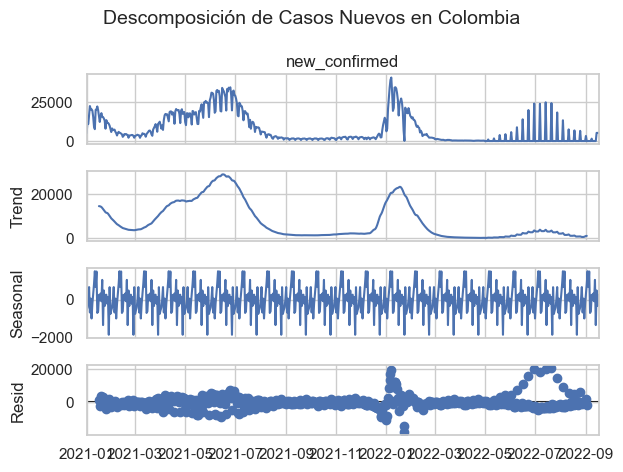

In [160]:
# Interpolar valores faltantes si existen
serie = df_pais['new_confirmed'].interpolate(method='linear')

# Descomposición
descomposicion = seasonal_decompose(serie, model='additive', period=30)

# Graficar
descomposicion.plot()
plt.suptitle(f'Descomposición de Casos Nuevos en {pais_objetivo}', fontsize=14)
plt.tight_layout()
plt.show()

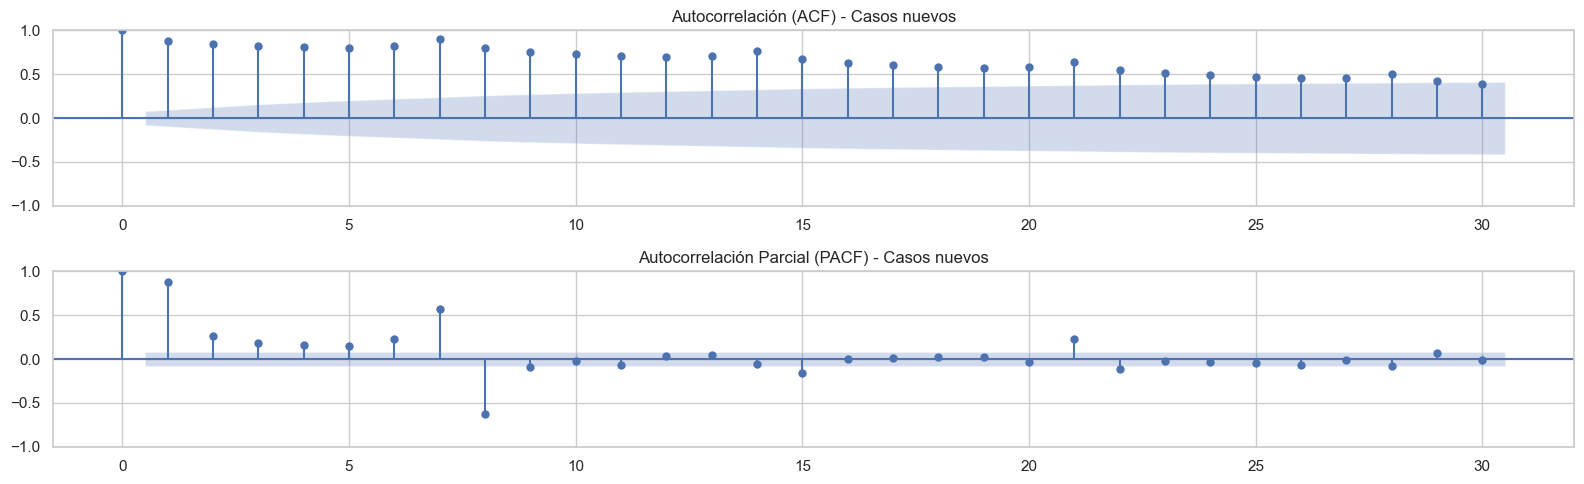

In [166]:
# Ajuste del tamaño
fig, axes = plt.subplots(2, 1, figsize=(16, 5))

# ACF - Autocorrelación
plot_acf(serie, lags=30, ax=axes[0])
axes[0].set_title('Autocorrelación (ACF) - Casos nuevos')

# PACF - Autocorrelación Parcial
plot_pacf(serie, lags=30, ax=axes[1], method='ywm')
axes[1].set_title('Autocorrelación Parcial (PACF) - Casos nuevos')

plt.tight_layout()
plt.show()

In [ ]:

from statsmodels.tsa.stattools import adfuller

##  Como ejmeplo unicial escojamos un país y hagamos un estudio de series de tiempo básico previo    

In [172]:
pais = 'Colombia'
serie = data_final[data_final['country_name'] == pais].copy()

# Asegurar formato datetime y ordenar
serie['date'] = pd.to_datetime(data_final['date'])
serie.sort_values('date', inplace=True)
serie.set_index('date', inplace=True)

# Serie temporal: interpolamos nulos si es necesario
ts = serie['new_confirmed'].interpolate(method='linear')

Estadistico ADFuller para verificarcionariedad 

In [173]:
resultado_adf = adfuller(ts)

print('--- Test ADF ---')
print(f'Estadístico ADF: {resultado_adf[0]:.4f}')
print(f'Valor p: {resultado_adf[1]:.4f}')
print('Valores críticos:')
for clave, valor in resultado_adf[4].items():
    print(f'   {clave}: {valor:.4f}')

--- Test ADF ---
Estadístico ADF: -3.0829
Valor p: 0.0278
Valores críticos:
   1%: -3.4411
   5%: -2.8663
   10%: -2.5693


La serie es estacionaria.

### Comparación variable 'new_confirmed' para todos los paises

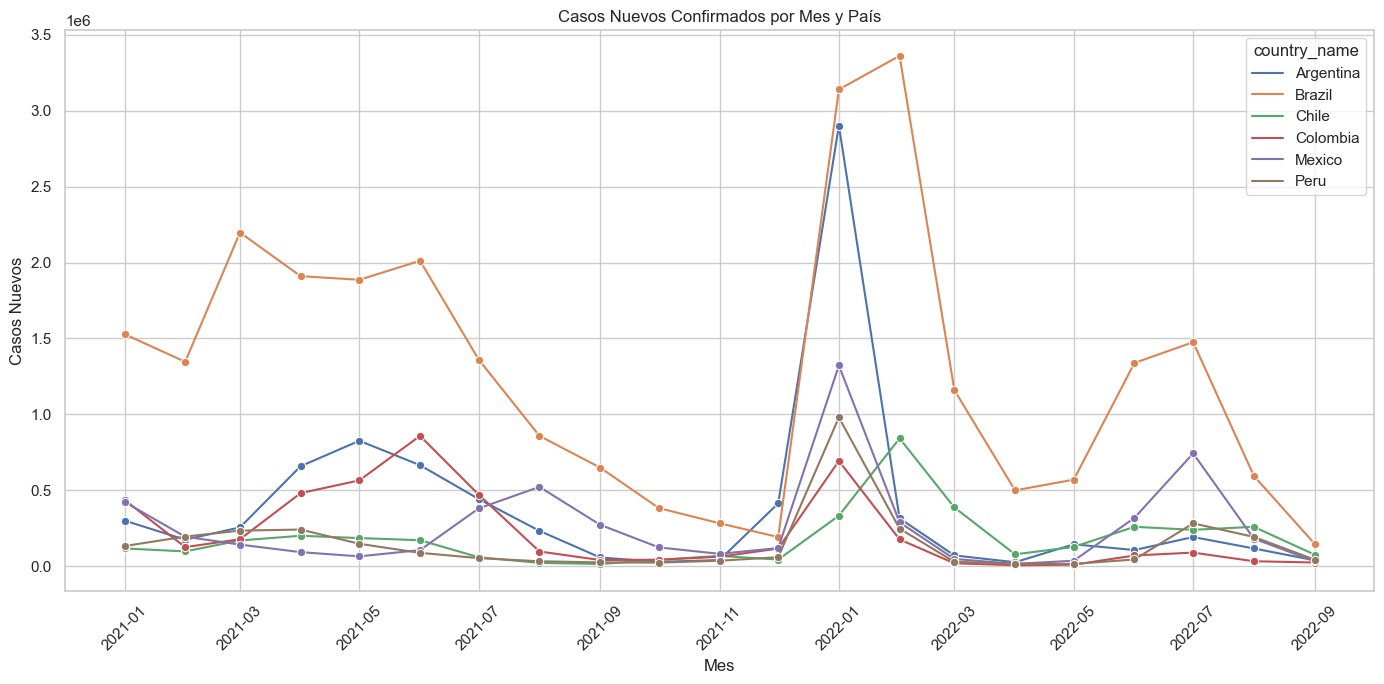

In [ ]:
# Agrupación mensual por país
data_final['year_month'] = data_final['date'].dt.to_period('M')
casos_mensual = data_final.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()

# Convertimos a timestamp para graficar
casos_mensual['year_month'] = casos_mensual['year_month'].dt.to_timestamp()

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
sns.lineplot(data=casos_mensual, x='year_month', y='new_confirmed', hue='country_name', marker='o')

plt.title('Casos Nuevos Confirmados por Mes y País')
plt.xlabel('Mes')
plt.ylabel('Casos Nuevos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

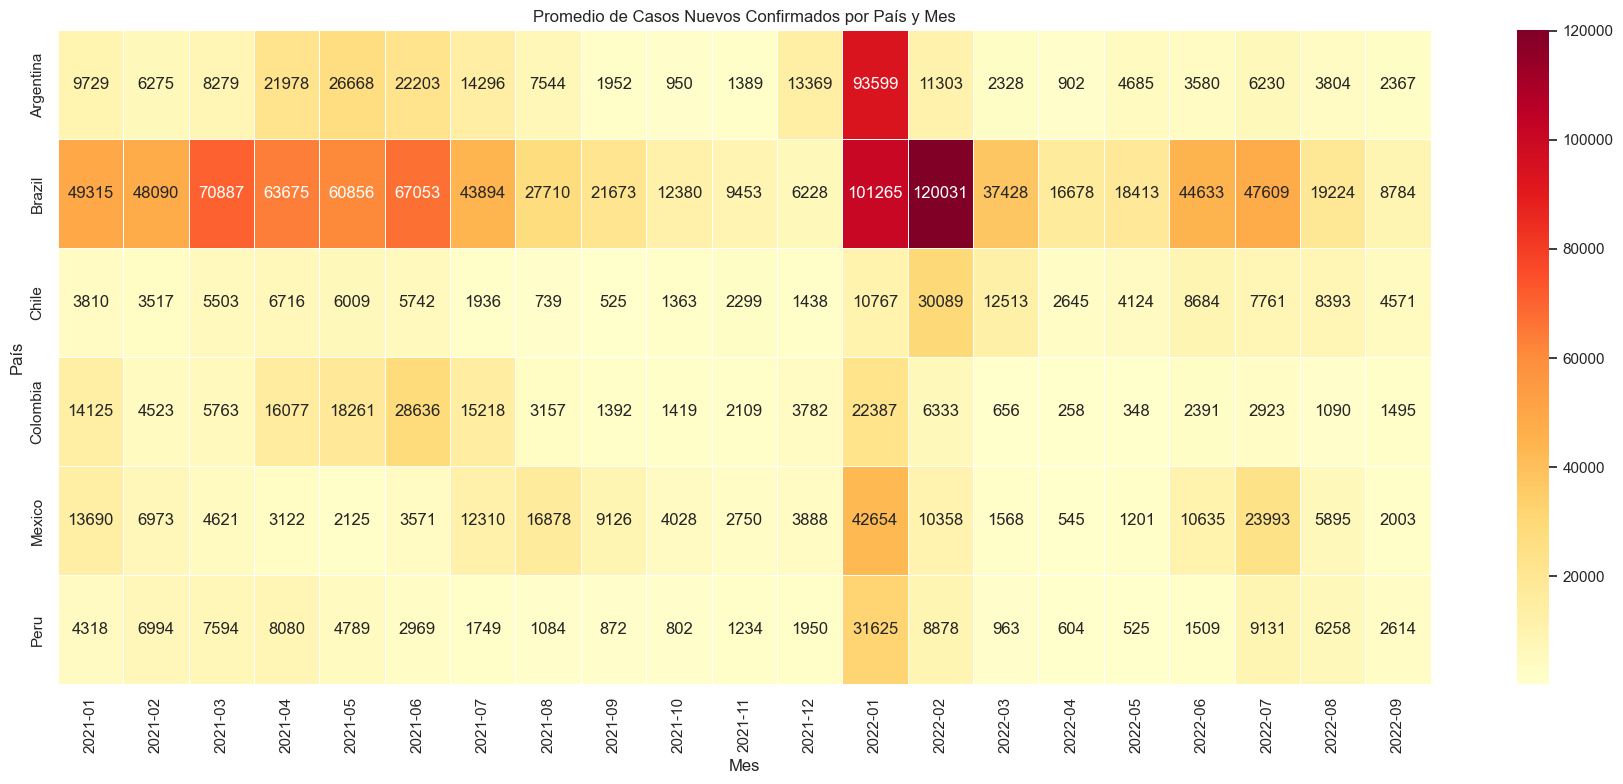

In [77]:
# Agrupar por país y mes
pivot_table = data_final.groupby(['country_name', 'year_month'])['new_confirmed'].mean().unstack().fillna(0)

# Mapa de calor
plt.figure(figsize=(18,8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".0f", linewidths=0.5)

plt.title('Promedio de Casos Nuevos Confirmados por País y Mes')
plt.xlabel('Mes')
plt.ylabel('País')
plt.tight_layout()
plt.show()

## Graficos.

### Preparacion de los datos

In [185]:
data_final['year'] = data_final['date'].dt.year
data_final['month'] = data_final['date'].dt.month
data_final['week'] = data_final['date'].dt.isocalendar().week

1.  Evolución de Casos Activos vs. Recuperados

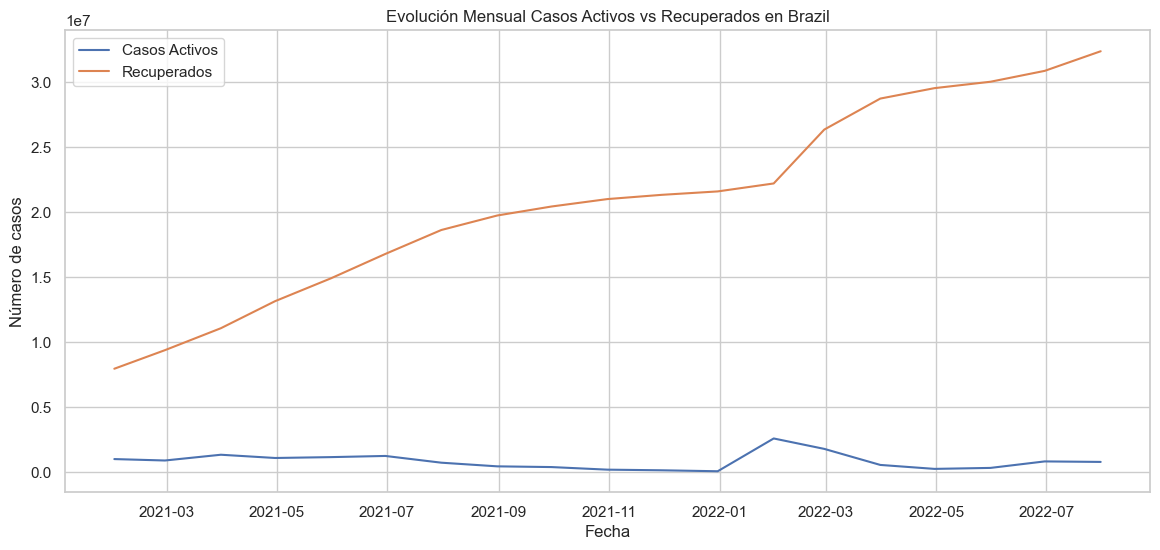

In [189]:

pais = 'Brazil'  # Cambia por cualquier país que quieras analizar
df_pais = data_final[data_final['country_name'] == pais].copy()

# Aseguramos que 'date' sea índice datetime
df_pais.set_index('date', inplace=True)

# Tomamos el último dato acumulado por mes
monthly_data = df_pais.resample('M').last()

monthly_data = monthly_data[monthly_data.index <= '2022-08-30']

# Calculamos casos activos mensuales: Confirmados - Recuperados - Fallecidos
monthly_data['active_cases'] = monthly_data['cumulative_confirmed'] - monthly_data['cumulative_recovered'] - monthly_data['cumulative_deceased']

plt.figure(figsize=(14,6))
plt.plot(monthly_data.index, monthly_data['active_cases'], label='Casos Activos')
plt.plot(monthly_data.index, monthly_data['cumulative_recovered'], label='Recuperados')
plt.title(f"Evolución Mensual Casos Activos vs Recuperados en {pais}")
plt.xlabel('Fecha')
plt.ylabel('Número de casos')
plt.legend()
plt.grid(True)
plt.show()

2. Relación entre vacunación y reducción de casos

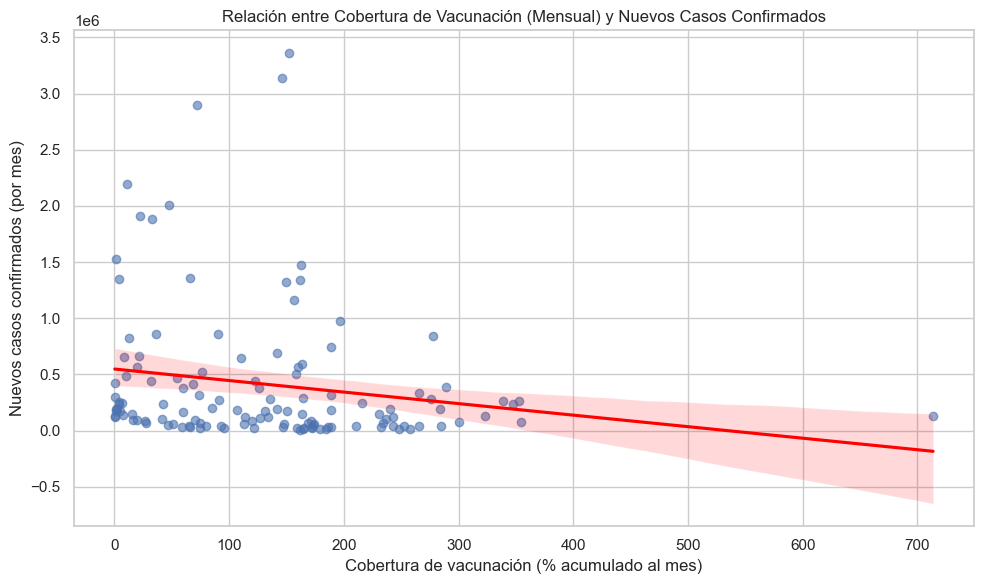

In [178]:
data_final['year_month'] = data_final['date'].dt.to_period('M')

# Último valor del mes por país
ultimo_mes = data_final.sort_values('date').groupby(['country_name', 'year_month']).tail(1)

# Calcular cobertura al final de cada mes
ultimo_mes['vacunas_por_100'] = (ultimo_mes['cumulative_vaccine_doses_administered'] / ultimo_mes['population']) * 100

# Calcular casos nuevos totales por mes
casos_mes = data_final.groupby(['country_name', 'year_month'])['new_confirmed'].sum().reset_index()

# Unir ambos dataframes
vacunas_casos = pd.merge(ultimo_mes[['country_name', 'year_month', 'vacunas_por_100']], casos_mes, on=['country_name', 'year_month'])

# Gráfico de dispersión con regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    data=vacunas_casos,
    x='vacunas_por_100',
    y='new_confirmed',
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Relación entre Cobertura de Vacunación (Mensual) y Nuevos Casos Confirmados')
plt.xlabel('Cobertura de vacunación (% acumulado al mes)')
plt.ylabel('Nuevos casos confirmados (por mes)')
plt.grid(True)
plt.tight_layout()
plt.show()

3. Impacto de Urbanización en propagación (población urbana vs casos nuevos)

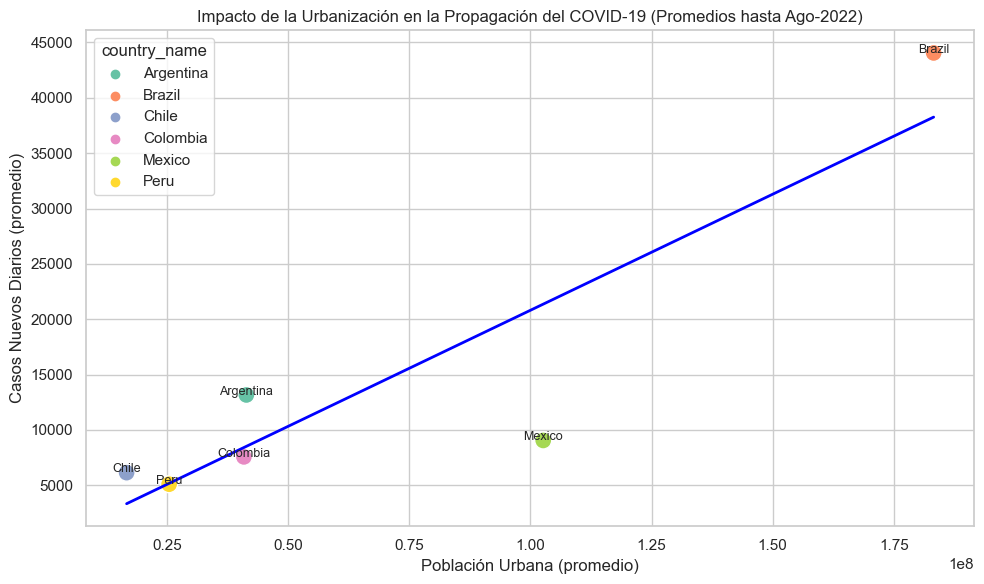

In [197]:

# Agrupar por país: promedio mensual de casos nuevos y población urbana
urban_impact = (
    data_final[data_final['date'] <= '2022-08-30']
    .groupby('country_name')[['new_confirmed', 'population_urban']]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión
sns.regplot(
    data=urban_impact,
    x='population_urban',
    y='new_confirmed',
    scatter=False,
    ci=None,
    color='blue',
    line_kws={"linewidth": 2, "linestyle": "-"}
)

# Scatter con colores por país
sns.scatterplot(
    data=urban_impact,
    x='population_urban',
    y='new_confirmed',
    hue='country_name',
    s=150,
    palette='Set2'
)

# Etiquetas de país
for i in range(len(urban_impact)):
    plt.text(
        x=urban_impact['population_urban'][i],
        y=urban_impact['new_confirmed'][i] + 20,
        s=urban_impact['country_name'][i],
        fontsize=9,
        ha='center'
    )

plt.title('Impacto de la Urbanización en la Propagación del COVID-19 (Promedios hasta Ago-2022)')
plt.xlabel('Población Urbana (promedio)')
plt.ylabel('Casos Nuevos Diarios (promedio)')
plt.grid(True)
plt.tight_layout()
plt.show()

4. Evolución Semanal de Casos Nuevos

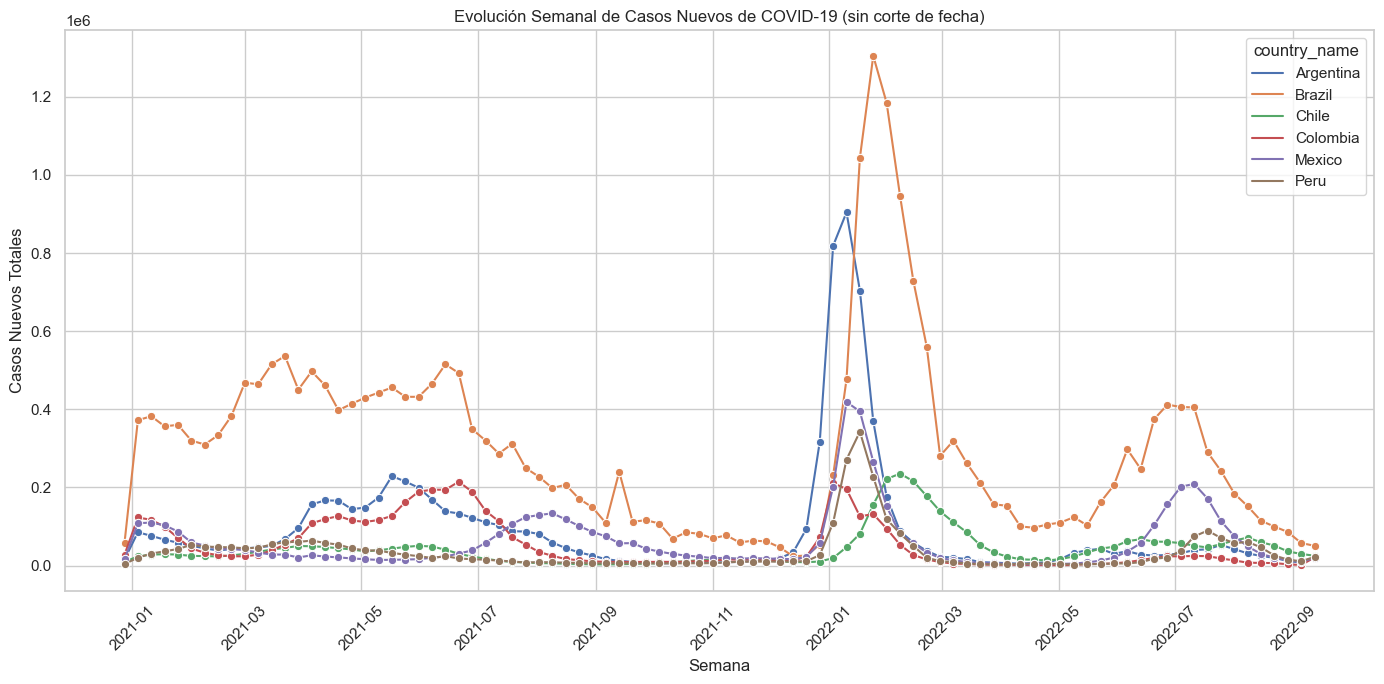

In [203]:

# Crear columna de semana
data_final['semana'] = data_final['date'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar por semana y país
casos_semanales = data_final.groupby(['semana', 'country_name'])['new_confirmed'].sum().reset_index()

# Gráfico
plt.figure(figsize=(14, 7))
sns.lineplot(data=casos_semanales, x='semana', y='new_confirmed', hue='country_name', marker='o')

plt.title('Evolución Semanal de Casos Nuevos de COVID-19 (sin corte de fecha)')
plt.xlabel('Semana')
plt.ylabel('Casos Nuevos Totales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

5.   Evolución de muertes diarias

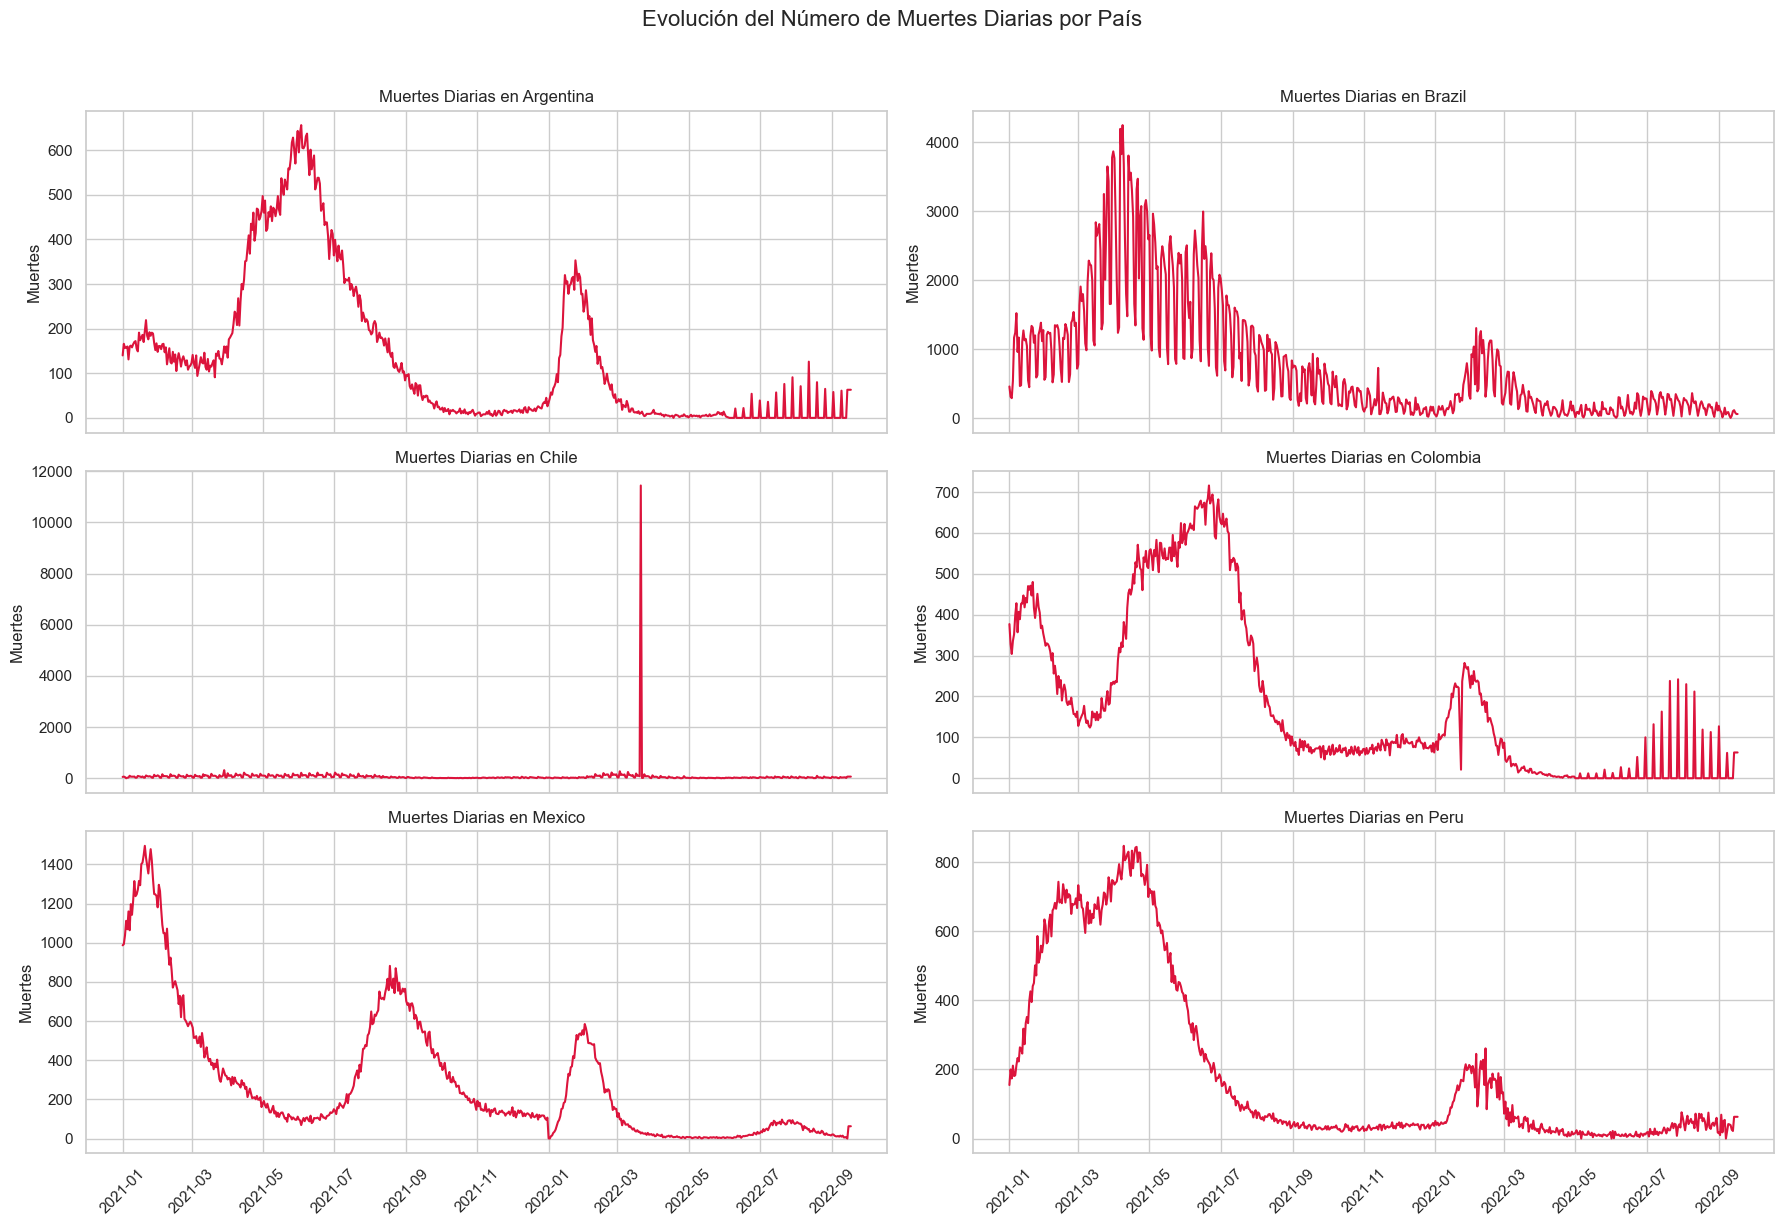

In [205]:
# Aseguramos el orden por fecha
data_final = data_final.sort_values(by='date')

# Agrupamos por fecha y país
muertes_diarias = data_final.groupby(['date', 'country_name'])['new_deceased'].sum().reset_index()

# Lista de países
paises = muertes_diarias['country_name'].unique()

# Crear subplots
fig, axs = plt.subplots(3, 2, figsize=(18, 12), sharex=True)
axs = axs.flatten()

# Graficar por país
for i, pais in enumerate(paises):
    df_pais = muertes_diarias[muertes_diarias['country_name'] == pais]
    sns.lineplot(data=df_pais, x='date', y='new_deceased', ax=axs[i], color='crimson')
    axs[i].set_title(f'Muertes Diarias en {pais}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Muertes')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(True)

plt.suptitle('Evolución del Número de Muertes Diarias por País', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

6. Comparación entre prevalencia y mortalidad

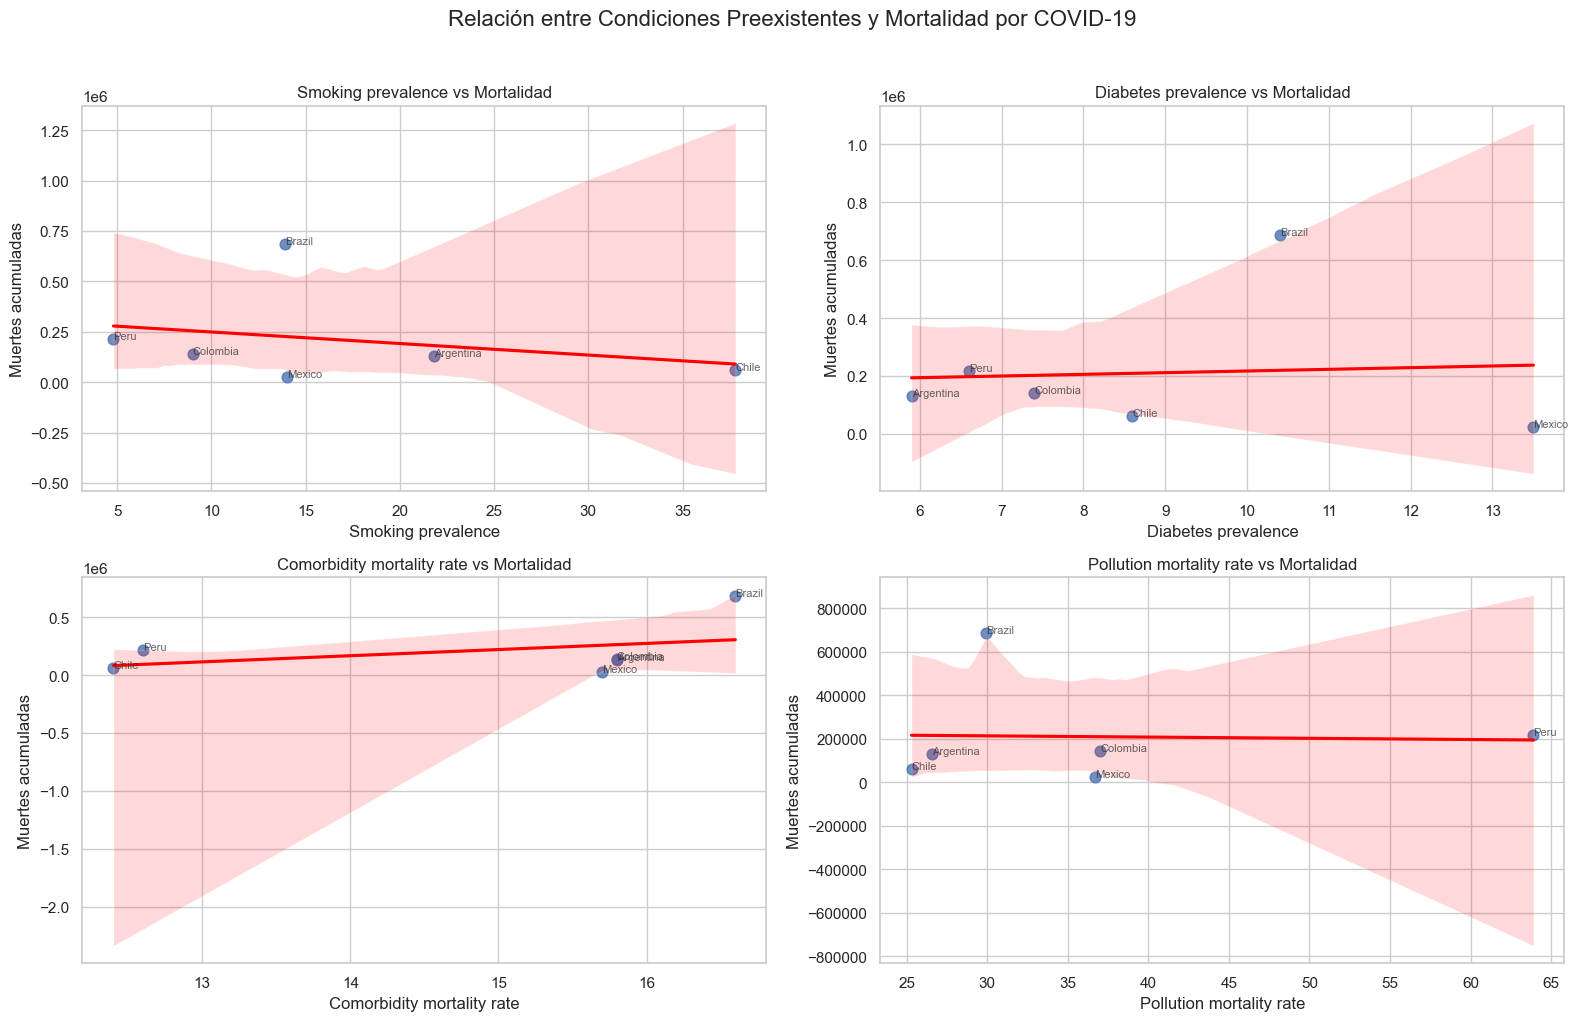

In [76]:
# Tomar el último dato disponible por país
condiciones_mortalidad = data_final.sort_values(['country_name', 'date']).groupby('country_name').last().reset_index()

# Lista de condiciones
condiciones = ['smoking_prevalence', 'diabetes_prevalence', 'comorbidity_mortality_rate', 'pollution_mortality_rate']
mortalidad = 'cumulative_deceased'

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

# Graficar cada condición vs mortalidad con etiquetas de país
for i, cond in enumerate(condiciones):
    ax = axs[i]
    sns.regplot(
        data=condiciones_mortalidad,
        x=cond,
        y=mortalidad,
        ax=ax,
        scatter_kws={'s': 60},
        line_kws={'color': 'red'},
    )
    
    # Agregar etiquetas de país a cada punto
    for _, row in condiciones_mortalidad.iterrows():
        x_val = row[cond]
        y_val = row[mortalidad]
        country = row['country_name']
        if pd.notnull(x_val) and pd.notnull(y_val):
            ax.text(x_val, y_val, country, fontsize=8, alpha=0.7)

    ax.set_title(f'{cond.replace("_", " ").capitalize()} vs Mortalidad')
    ax.set_xlabel(cond.replace("_", " ").capitalize())
    ax.set_ylabel('Muertes acumuladas')

plt.suptitle('Relación entre Condiciones Preexistentes y Mortalidad por COVID-19', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

7. Variación mensual de casos y muertes

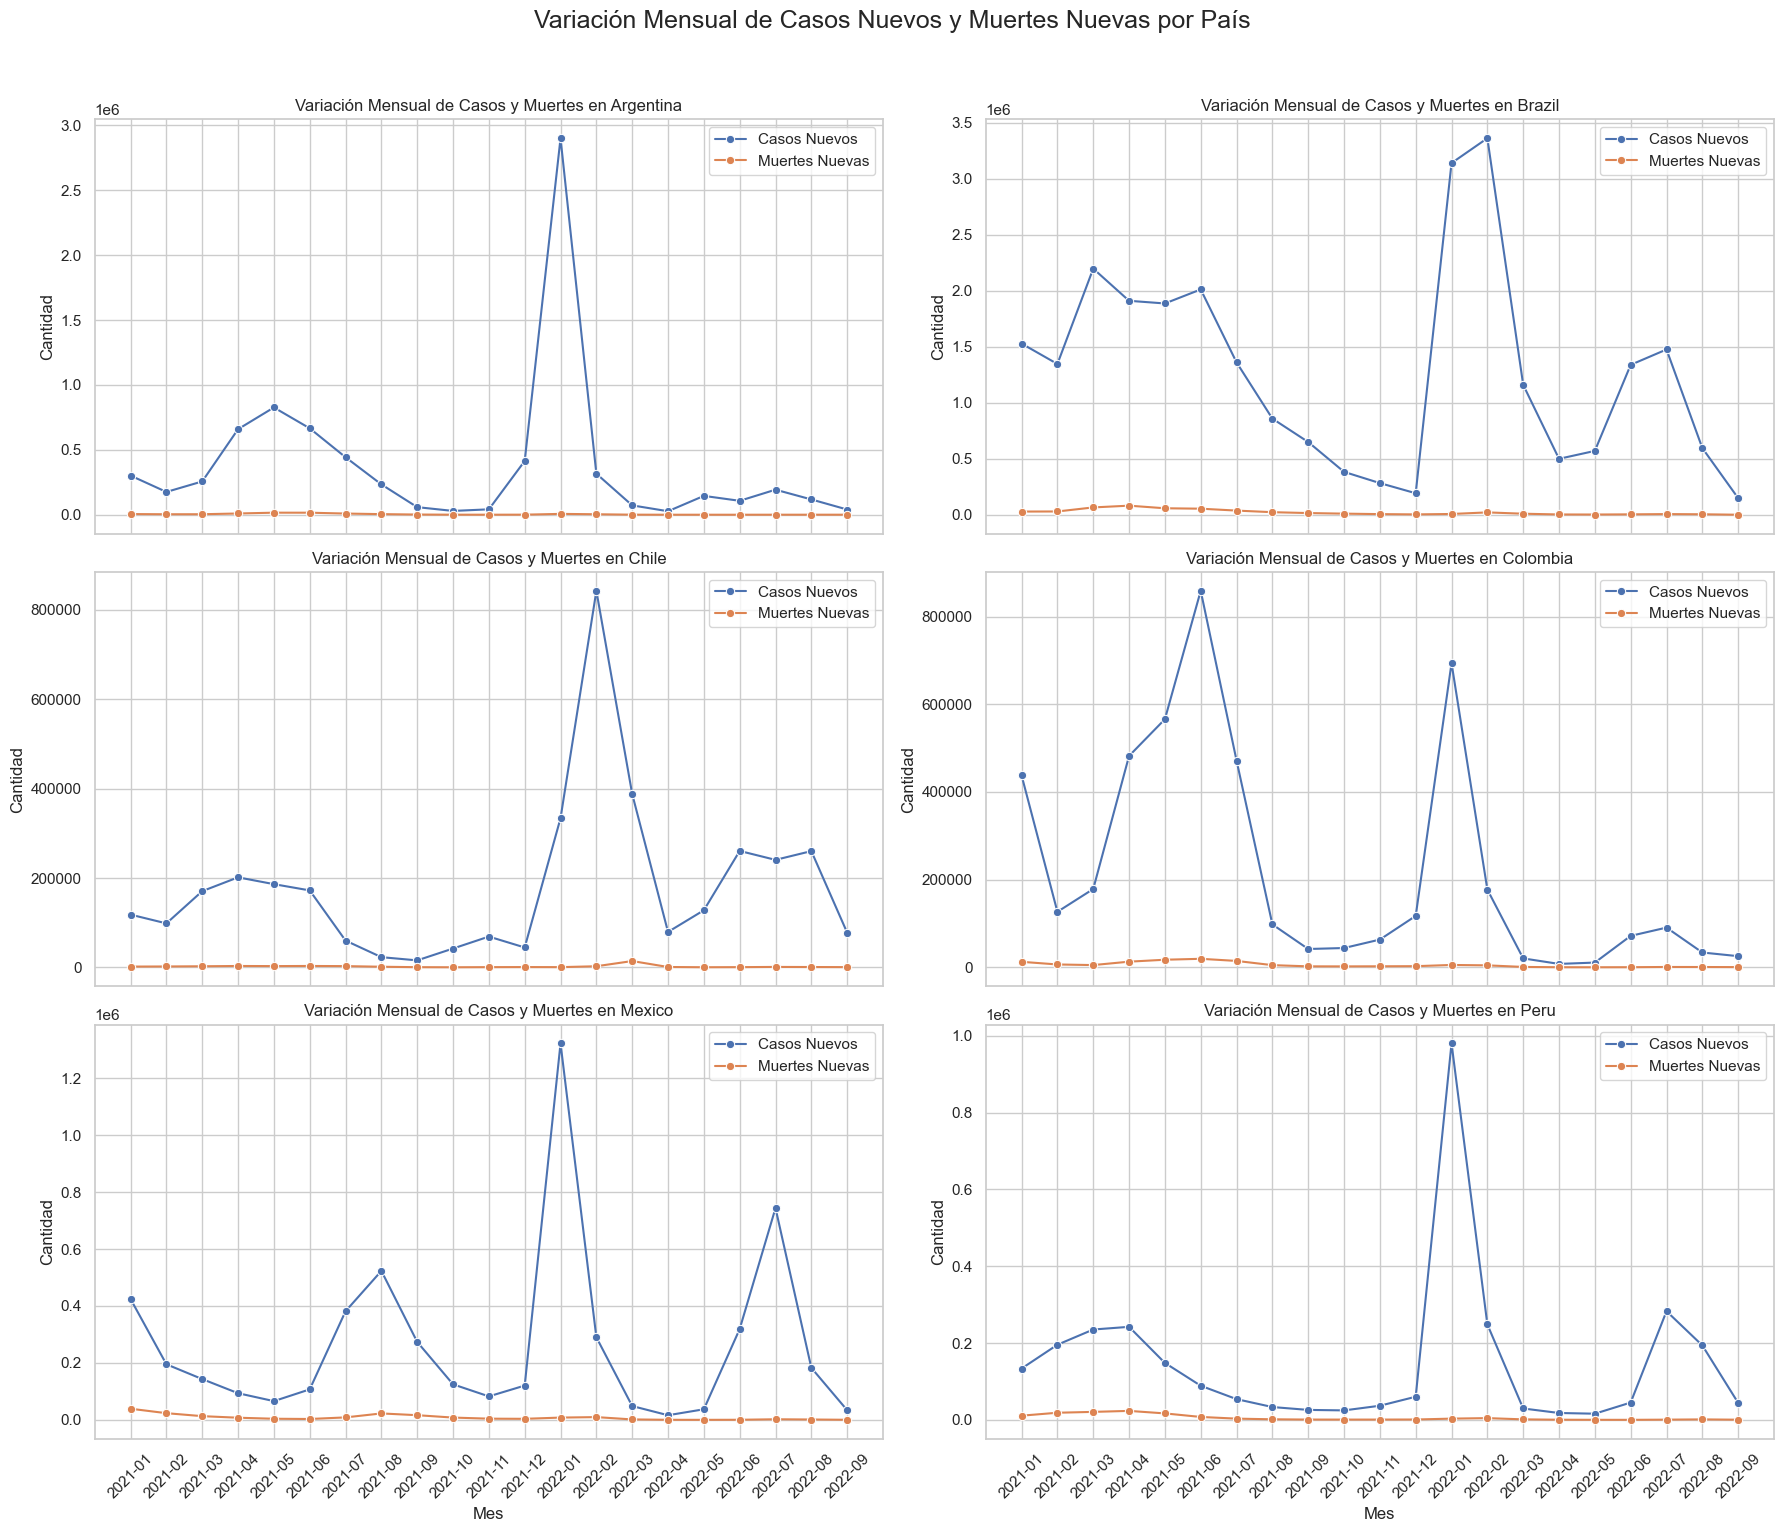

In [78]:
# Crear columna mes
data_final['mes'] = data_final['date'].dt.to_period('M').astype(str)

# Agrupar por país y mes
mensual = data_final.groupby(['mes', 'country_name'])[['new_confirmed', 'new_deceased']].sum().reset_index()

# Lista de países
paises = mensual['country_name'].unique()

# Crear subplots 3x2
fig, axs = plt.subplots(3, 2, figsize=(18, 15), sharex=True)
axs = axs.flatten()

for i, pais in enumerate(paises):
    df_pais = mensual[mensual['country_name'] == pais]
    
    sns.lineplot(data=df_pais, x='mes', y='new_confirmed', marker='o', label='Casos Nuevos', ax=axs[i])
    sns.lineplot(data=df_pais, x='mes', y='new_deceased', marker='o', label='Muertes Nuevas', ax=axs[i])
    
    axs[i].set_title(f'Variación Mensual de Casos y Muertes en {pais}')
    axs[i].set_xlabel('Mes')
    axs[i].set_ylabel('Cantidad')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle('Variación Mensual de Casos Nuevos y Muertes Nuevas por País', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

8. 

In [211]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


def analizar_serie_temporal(data: pd.DataFrame, pais: str, variable: str, model: str='additive', period: int=7):
    """
    Realiza análisis de autocorrelación (ACF), autocorrelación parcial (PACF) 
    y descomposición de series temporales para un país y variable dados.
    
    Parámetros:
    - data: DataFrame con datos limpios.
    - pais: str, nombre del país a analizar.
    - variable: str, columna de la serie temporal a analizar.
    - model: str, 'additive' o 'multiplicative' para la descomposición.
    - period: int, número de observaciones que conforman el ciclo estacional (default 7).
    
    Muestra gráficos de autocorrelación, autocorrelación parcial y de descomposición.
    """
    
    # Validaciones
    if pais not in data['country_name'].unique():
        raise ValueError(f"El país '{pais}' no se encuentra en el dataset.")
    if variable not in data.columns:
        raise ValueError(f"La variable '{variable}' no existe en el dataset.")
    if not pd.api.types.is_numeric_dtype(data[variable]):
        raise TypeError(f"La variable '{variable}' no es numérica y no se puede analizar como serie temporal.")
    
    # Filtrar y ordenar
    df_pais = data[data['country_name'] == pais].sort_values('date')
    serie = df_pais.set_index('date')[variable].dropna()
    
    if serie.empty:
        raise ValueError(f"No hay datos disponibles para la variable '{variable}' en el país '{pais}'.")
    
    # ACF
    plt.figure(figsize=(10,4))
    plot_acf(serie, lags=30, zero=False)
    plt.title(f'Autocorrelación (ACF) de {variable} - {pais}')
    plt.show()
    
    # PACF
    plt.figure(figsize=(10,4))
    plot_pacf(serie, lags=30, zero=False, method='ywm')
    plt.title(f'Autocorrelación Parcial (PACF) de {variable} - {pais}')
    plt.show()
    
    # Descomposición
    try:
        result = seasonal_decompose(serie, model=model, period=period)
        fig = result.plot()
        fig.set_size_inches(14,10)
        plt.suptitle(f'Descomposición Serie Temporal ({variable}) - {pais}', fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Error al descomponer la serie temporal: {e}")


<Figure size 1000x400 with 0 Axes>

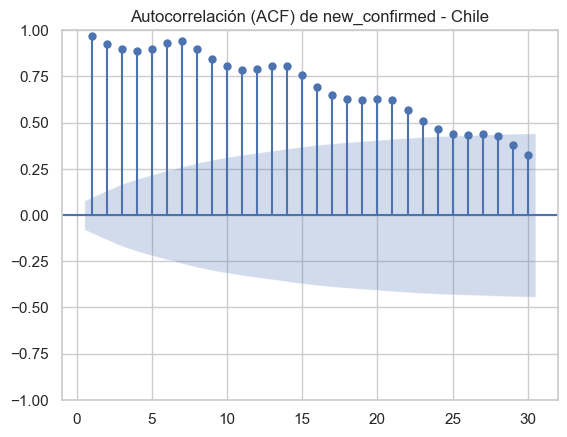

<Figure size 1000x400 with 0 Axes>

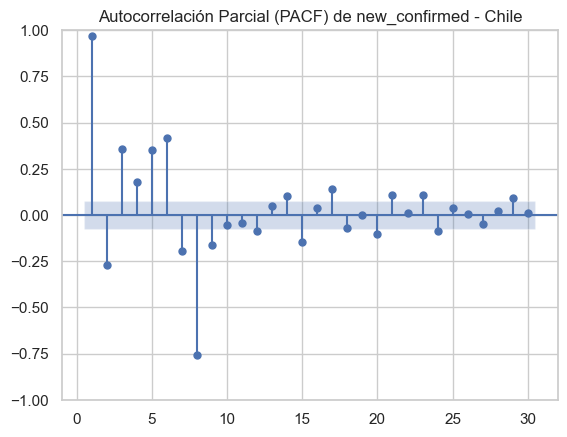

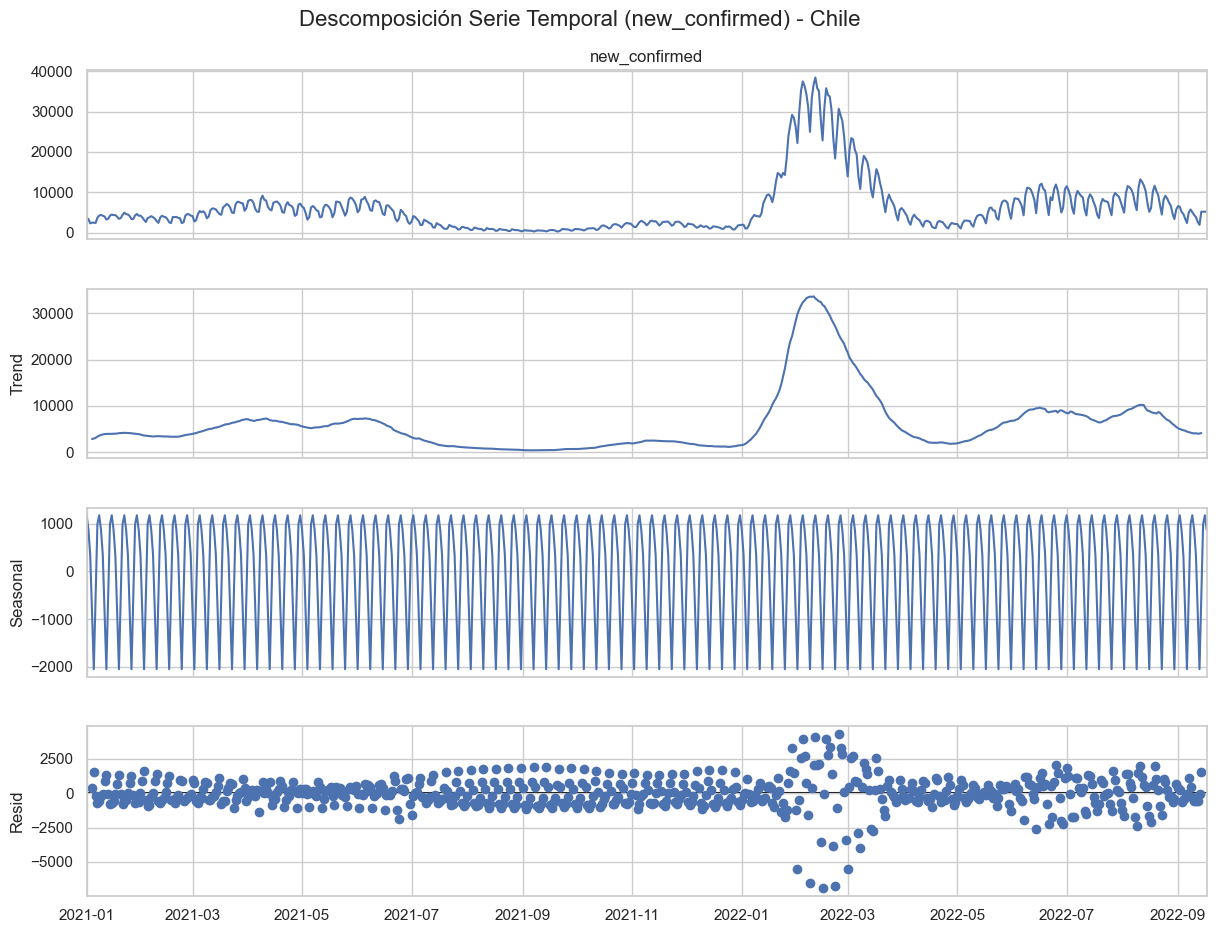

In [212]:
analizar_serie_temporal(data_final, 'Chile', 'new_confirmed')